# Focal colors across languages

Focal colors, or best examples of named color categories across languages, have traditionally been viewed as a reflection of certain cognitively or perceptually privileged colors that form the basis for universals of color naming.

We will examine both universal tendencies and variation of focal colors across languages.  In so doing we will explore the foundations of this influential idea, using the largest publicly-available relevant dataset.

Data are drawn from the [online archives of the World Color Survey (WCS)](http://www1.icsi.berkeley.edu/wcs/data.html), which contains detailed color naming data from 110 languages of non-industrialized societies, with around 20-25 speakers per language.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

### Read in data

There are two relevant files, both of which have already been downloaded from the WCS website for you:

- lang.txt associates each language in the dataset with an identifying number.
- foci-exp.txt contains all focal color data in the dataset.

We will read each into its own dataframe, and then combine.

In [2]:
# lang.txt : tab-separated, we care about the first 2 columns only: lg number and lg name
ldf = pd.read_csv('wcs-data/lang.txt', sep='\t', usecols=[0, 1], names=['LgNum', 'LgName'])
ldf

,LgNum,LgName
0,1,Abidji
1,2,Agarabi
2,3,Casiguran Agta
3,4,Aguacateco
4,5,Amarakaeri
...,...,...
105,106,Yakan
106,107,Yaminahua
107,108,Yucuna
108,109,Yupik


In [3]:
# we will want to get the lg name from the lg number, so convert this to a dict.
lgname = {num: name for num, name in zip(ldf.LgNum,ldf.LgName)}
lgname

{1: 'Abidji',
 2: 'Agarabi',
 3: 'Casiguran Agta',
 4: 'Aguacateco',
 5: 'Amarakaeri',
 6: 'Ampeeli',
 7: 'Amuzgo',
 8: 'Angaatiha',
 9: 'Apinaye',
 10: 'Arabela',
 11: 'Bahinemo',
 12: 'Bauzi',
 13: 'Berik',
 14: 'Bete',
 15: 'Bhili',
 16: 'Buglere',
 17: 'Cakchiquel',
 18: 'Ucayali Campa',
 19: 'Camsa',
 20: 'Candoshi',
 21: 'Cavine{\\x96}a',
 22: 'Cayapa',
 23: 'Ch{\\x87}cobo',
 24: 'Chavacano',
 25: 'Chayahuita',
 26: 'Chinanteco',
 27: 'Chiquitano',
 28: 'Chumburu',
 29: 'Cof{\\x87}n',
 30: 'Colorado',
 31: 'Eastern Cree',
 32: 'Culina',
 33: 'Didinga',
 34: 'Djuka',
 35: 'Dyimini',
 36: 'Ejagam',
 37: 'Ese Ejja',
 38: 'Carib',
 39: 'Guahibo',
 40: 'Guambiano',
 41: 'Guarijio',
 42: 'Ng{\\x8A}bere',
 43: 'Gunu',
 44: 'Halbi',
 45: 'Huasteco',
 46: 'Huave',
 47: 'Iduna',
 48: 'Ifugao',
 49: 'Sepik Iwam',
 50: 'Jicaque',
 51: 'Kalam',
 52: 'Kamano-Kafe',
 53: 'Karaja',
 54: 'Kemtuik',
 55: 'Kokoni',
 56: 'Konkomba',
 57: 'Kriol',
 58: 'Kuku-Yalanji',
 59: 'Long-haired Kuna',
 60: 'K

In [4]:
# now the main file.
# foci-exp.txt : tab-separated.  columns are:

# 0. Language Number: which lg is this?  range from 1..110
# 1. Speaker Number: which speaker of the lg?  total number of consultants varies per language
# 2. Focus Response: which number response is this for this speaker?  (not necessary for us)
# 3. Term Abbreviation: color term for which a focus response was given
# 4. Chip: WCS Grid Coordinates for focus response for that term by that speaker of that lg. 

# we'll use cols 0,1,3,4.
fdf = pd.read_csv('wcs-data/foci-exp.txt', sep='\t', usecols=[0, 1, 3, 4], names=['LgNum', 'Speaker', 'Term', "Chip"])
fdf

,LgNum,Speaker,Term,Chip
0,1,1,LF,A0
1,1,1,WK,D9
2,1,1,WK,D10
3,1,1,WK,D11
4,1,1,WK,D12
...,...,...,...,...
110779,110,25,B,J37
110780,110,25,B,J38
110781,110,25,B,J39
110782,110,25,B,J40


In [5]:
# insert lg name as column
fdf['LgName'] = fdf.apply(lambda row: lgname[row.LgNum], axis=1)
fdf

,LgNum,Speaker,Term,Chip,LgName
0,1,1,LF,A0,Abidji
1,1,1,WK,D9,Abidji
2,1,1,WK,D10,Abidji
3,1,1,WK,D11,Abidji
4,1,1,WK,D12,Abidji
...,...,...,...,...,...
110779,110,25,B,J37,Zapoteco
110780,110,25,B,J38,Zapoteco
110781,110,25,B,J39,Zapoteco
110782,110,25,B,J40,Zapoteco


In [6]:
# reorder columns to put LgNum and LgName next to each other
fdf = fdf[['LgNum', 'LgName', 'Speaker', 'Term', 'Chip']]
fdf

,LgNum,LgName,Speaker,Term,Chip
0,1,Abidji,1,LF,A0
1,1,Abidji,1,WK,D9
2,1,Abidji,1,WK,D10
3,1,Abidji,1,WK,D11
4,1,Abidji,1,WK,D12
...,...,...,...,...,...
110779,110,Zapoteco,25,B,J37
110780,110,Zapoteco,25,B,J38
110781,110,Zapoteco,25,B,J39
110782,110,Zapoteco,25,B,J40


### Now replicate the central finding of Regier et al. 2005.

Figure 2 of Regier et al. 2005 shows a contour plot of best-example or focal choices in the WCS.  This was obtained by simply pooling across languages, speakers, and terms, and plotting all such focal choices together as a single contour plot.  We will do the same, but as a heatmap.

In [7]:
# to create a heatmap, we need our data in a df with these columns:

# row of WCS grid: A-J
# col of WCS grid: 0-40
# hits: number of focal choices that fell in chip indexed by (row,col)

# so this means we want to know, for each chip in (row,col) form, how often it appeared in Chip column of fdf.
# so we examine the Chip column of fdf, and ask how often each value (chip) appeared in that column.
# hpc = hits per chip
hpc = fdf.Chip.value_counts()
hpc

A0     2048
J0     1988
A40    1068
A1     1054
A17    1035
       ... 
D32      18
D31      16
H13      15
D34      15
H14      14
Name: Chip, Length: 410, dtype: int64

In [8]:
# convert hpc to a dataframe
hpc = pd.DataFrame({'Chip': hpc.index, 'Count': hpc.values})
hpc

,Chip,Count
0,A0,2048
1,J0,1988
2,A40,1068
3,A1,1054
4,A17,1035
...,...,...
405,D32,18
406,D31,16
407,H13,15
408,D34,15


In [9]:
# now split apart Chip designation into separate Row and Col designations.
hpc['Row'] = hpc.apply(lambda row: row.Chip[0], axis=1)
hpc['Col'] = hpc.apply(lambda row: int(row.Chip[1:]), axis=1)
hpc

,Chip,Count,Row,Col
0,A0,2048,A,0
1,J0,1988,J,0
2,A40,1068,A,40
3,A1,1054,A,1
4,A17,1035,A,17
...,...,...,...,...
405,D32,18,D,32
406,D31,16,D,31
407,H13,15,H,13
408,D34,15,D,34


In [10]:
# now "pivot" the data - i.e. turn it into a df with one axis = WCS Row, and the other axis = WCS Col
hpc_pivoted = hpc.pivot("Row", "Col", "Count")
hpc_pivoted

Col,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
Row,,,,,,,,,,,,,,,,,,,,,
A,2048,1054,1028,1031,1028,1026,1030,1027,1023,1018,...,1018,1023,1020,1021,1015,1020,1015,1028,1018,1068
B,109,86,81,83,85,82,81,74,73,71,...,70,72,70,74,71,70,78,80,77,87
C,66,102,100,88,81,85,67,65,492,752,...,22,28,26,25,40,38,63,76,65,81
D,77,75,74,56,51,46,174,130,153,84,...,16,18,23,15,24,30,40,55,51,71
E,139,99,70,69,132,116,37,41,37,34,...,27,27,32,28,28,28,35,66,79,81
F,160,278,243,212,217,37,33,46,44,50,...,30,42,65,44,31,36,41,59,131,198
G,144,668,542,343,78,45,65,77,69,55,...,63,55,66,59,40,44,39,69,83,260
H,91,127,141,144,59,37,81,107,79,51,...,95,86,112,95,60,73,51,61,58,69
I,113,102,102,78,73,85,86,83,75,66,...,93,66,73,69,59,63,59,83,75,96


In [11]:
# NB: we are focusing on rows B-I (chromatic), and leaving out rows A and J (achromatic).
# similarly, we are dropping out column 0 (achromatic).
# this follows the regier et al. 2005 plot.
hpc_pivoted_trimmed = hpc_pivoted.loc['B' : 'I'].loc[:, hpc_pivoted.columns != 0]
hpc_pivoted_trimmed

Col,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
Row,,,,,,,,,,,,,,,,,,,,,
B,86,81,83,85,82,81,74,73,71,118,...,70,72,70,74,71,70,78,80,77,87
C,102,100,88,81,85,67,65,492,752,351,...,22,28,26,25,40,38,63,76,65,81
D,75,74,56,51,46,174,130,153,84,66,...,16,18,23,15,24,30,40,55,51,71
E,99,70,69,132,116,37,41,37,34,31,...,27,27,32,28,28,28,35,66,79,81
F,278,243,212,217,37,33,46,44,50,32,...,30,42,65,44,31,36,41,59,131,198
G,668,542,343,78,45,65,77,69,55,33,...,63,55,66,59,40,44,39,69,83,260
H,127,141,144,59,37,81,107,79,51,39,...,95,86,112,95,60,73,51,61,58,69
I,102,102,78,73,85,86,83,75,66,79,...,93,66,73,69,59,63,59,83,75,96


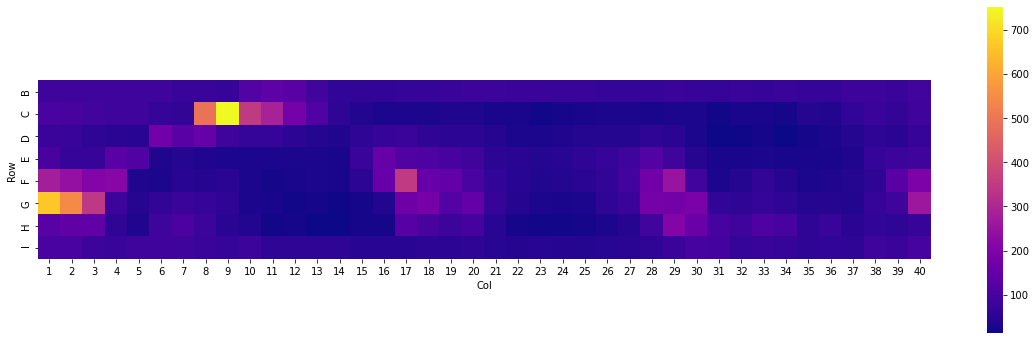

In [12]:
# now plot as heatmap.
plt.figure(figsize=(20, 6))
ax = sns.heatmap(hpc_pivoted_trimmed, square=True, cmap='plasma')
plt.show()

In [13]:
# we can easily see which chips have the most focal hits.
# which have the fewest?  harder to tell just by looking at the plot - so let's ask for that explicitly.
mincount = hpc.Count.min()
hpc[hpc.Count == mincount]

,Chip,Count,Row,Col
409,H14,14,H,14


### Replication achieved!   

The basic pattern is replicated in the above plot.  That finding is consistent with the notion that there are strong universals in color naming across languages, reflected in the colors that speakers of a wide range of languages select as the best examples of color names in their languages.

But there is already a note of complication.  We also saw that every chip in the entire grid was chosen by at least 14 speakers (and often many more) as the best example of some color term in some language.  That suggests an interesting amount of cross-language variation, that is obscured when we simply pool all responses together.





### So now let's extend to new analyses, that explore cross-language variation.

In principle we could create 2-D heatmaps for each language - and feel free to do so if you like - after all, you have a model above that you can extend.  But for now, for simplicity, we will consider focus choice responses as a 1-dimensional distribution over columns of the stimulus grid, rather than a 2-dimensional distribution over both rows and columns.  To do this, we will sum together all focus choices that fell in different rows within a single column of the grid, getting a total count for each column.  This set of counts can then be converted to a probability distribution by normalizing.  I believe the first publication to propose such 1-D histograms of focus counts was:

- MacLaury, Robert E. (1997). Ethnographic evidence of unique hues and elemental colors. <i>Behavioral and Brain Sciences</i>, 20(2), 202-203.

In [14]:
# start by specifying the set of columns to target.
# we leave out column 0 because it is achromatic
cols = list(range(1,40+1))
cols

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40]

In [15]:
# function to plot a distribution of focus counts across WCS columns, either normalized or not.
def plot_distrib(d):
    plt.figure(figsize=(18, 4))
    plt.bar(list(d.keys()), list(d.values()))
    plt.show()

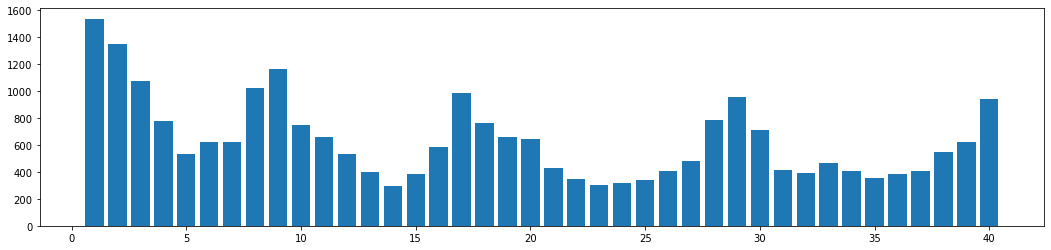

In [16]:
# now for each column, determine the number of focus hits that fell in that column.
# we are weeding out chips in rows A and J because they are achromatic.
# store in a dict called d.
d_wcs = {}
for col in cols:
    subdf = hpc[(hpc.Col == col) & (hpc.Row != 'A') & (hpc.Row != 'J')]
    total = subdf.Count.sum()
    d_wcs[col] = total 

plot_distrib(d_wcs)

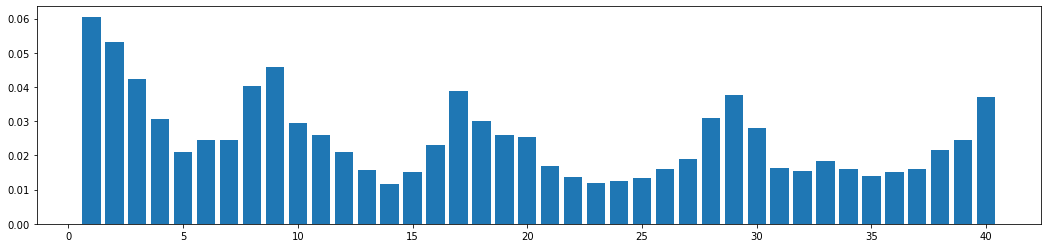

In [17]:
# now cast as probability distribution, and re-plot.
total = sum(d_wcs.values())
prob_wcs = {k: v/total for (k,v)in d_wcs.items()}

plot_distrib(prob_wcs)

,LgNum,LgName,Speaker,Term,Chip
0,1,Abidji,1,LF,A0
1,1,Abidji,1,WK,D9
2,1,Abidji,1,WK,D10
3,1,Abidji,1,WK,D11
4,1,Abidji,1,WK,D12
...,...,...,...,...,...
275,1,Abidji,25,F,B6
276,1,Abidji,25,LB,J0
277,1,Abidji,25,G,F29
278,1,Abidji,25,G,F30


,Chip,Count
0,A0,22
1,J0,21
2,G2,11
3,G1,11
4,F1,8
...,...,...
125,B8,1
126,F32,1
127,D10,1
128,D3,1


,Chip,Count,Row,Col
0,A0,22,A,0
1,J0,21,J,0
2,G2,11,G,2
3,G1,11,G,1
4,F1,8,F,1
...,...,...,...,...
125,B8,1,B,8
126,F32,1,F,32
127,D10,1,D,10
128,D3,1,D,3


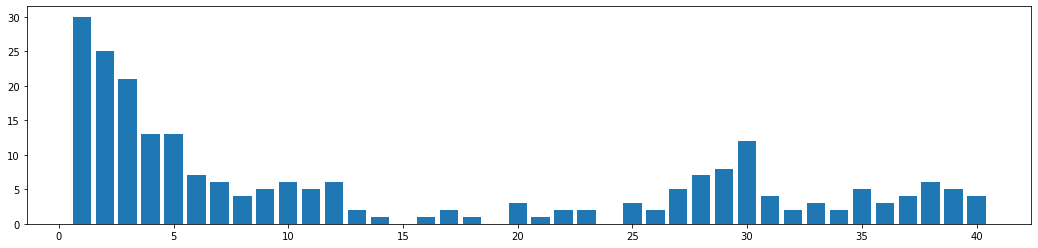

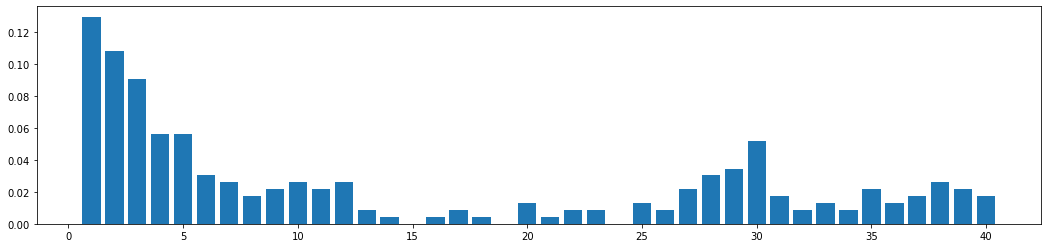

In [18]:
# now that we have established what appear to be universal tendencies, let's zoom in and consider individual
# languages separately, to get a sense for the cross-language variation underlying this pattern.

# first let's do that for a single sample lg.

# sample lg
lg = 'Abidji'

# now do everything you did above, to get the 1-D plot, but on a per-lg basis.
lg_df = fdf[fdf.LgName == lg]
display(lg_df)
hpc = lg_df.Chip.value_counts()

# convert hpc to a dataframe
hpc = pd.DataFrame({'Chip': hpc.index, 'Count': hpc.values})
display(hpc)

# now split apart Chip designation into separate Row and Col designations.
hpc['Row'] = hpc.apply(lambda row: row.Chip[0], axis=1)
hpc['Col'] = hpc.apply(lambda row: int(row.Chip[1:]), axis=1)
display(hpc)

# get columns counts, summing across rows.
cols = list(range(1,40+1))
d = {}
for col in cols:
    subdf = hpc[(hpc.Col == col) & (hpc.Row != 'A') & (hpc.Row != 'J')]
    total = subdf.Count.sum()
    d[col] = total

plot_distrib(d)

# now cast as probability distribution, and re-plot.
total = sum(d.values())
prob = {k: v/total for (k,v)in d.items()}

plot_distrib(prob)

There are 110 different languages in the WCS.
Abidji


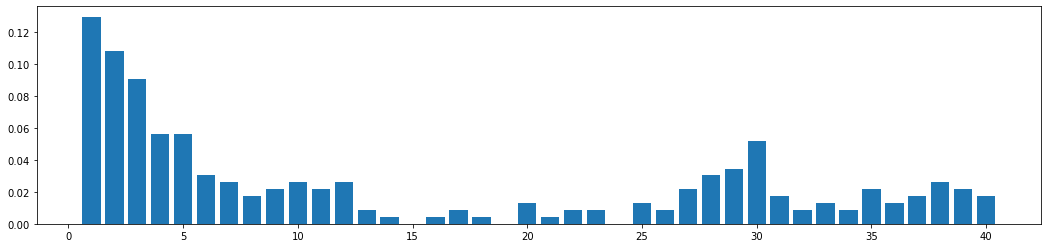

Agarabi


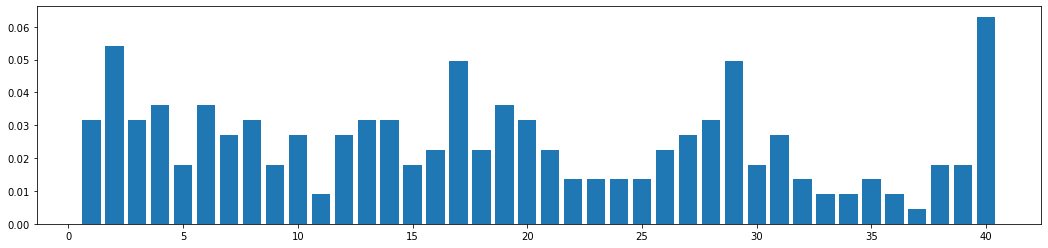

Casiguran Agta


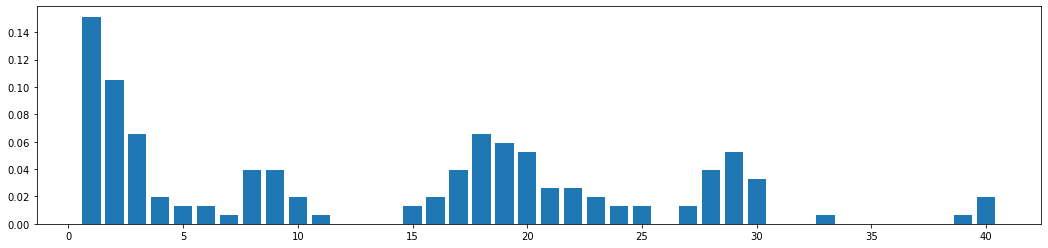

Aguacateco


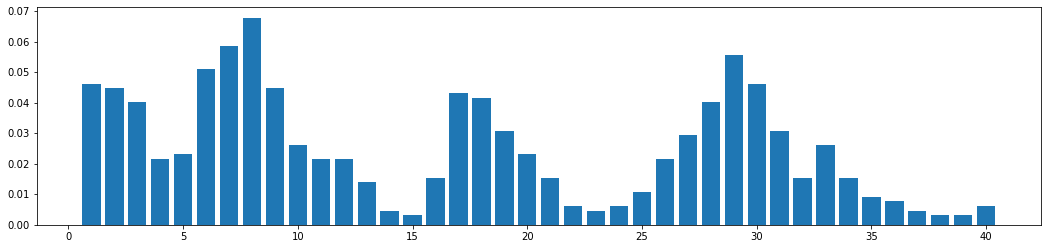

Amarakaeri


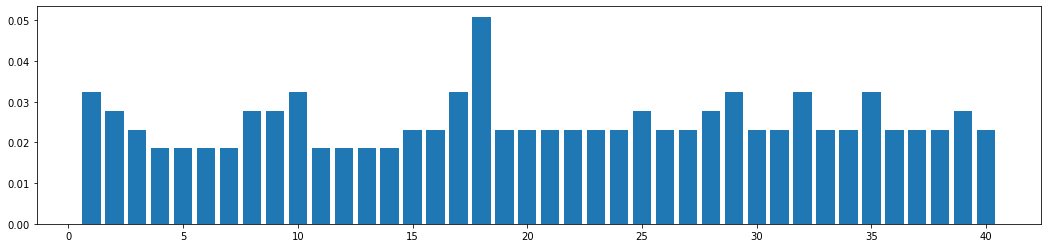

Ampeeli


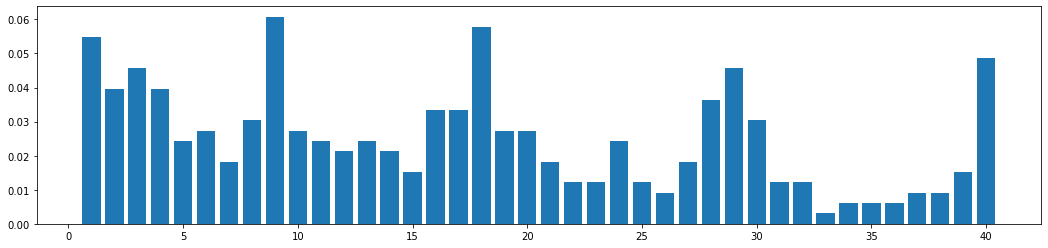

Amuzgo


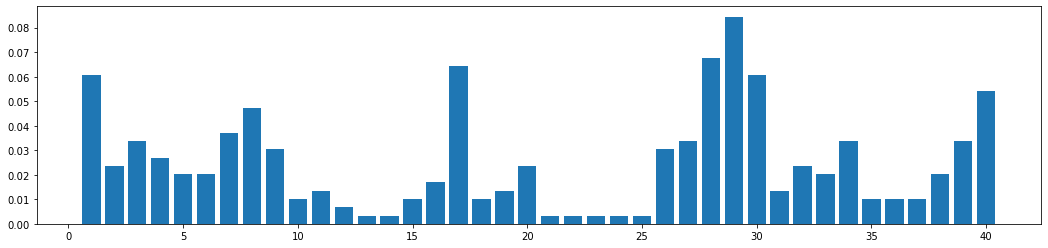

Angaatiha


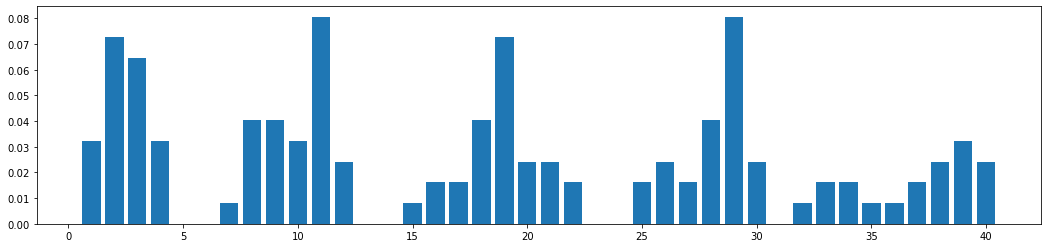

Apinaye


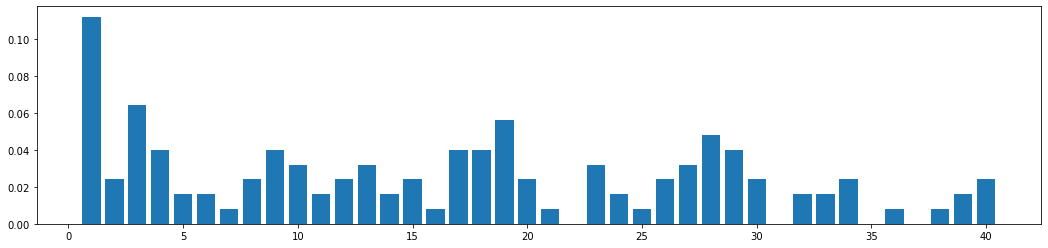

Arabela


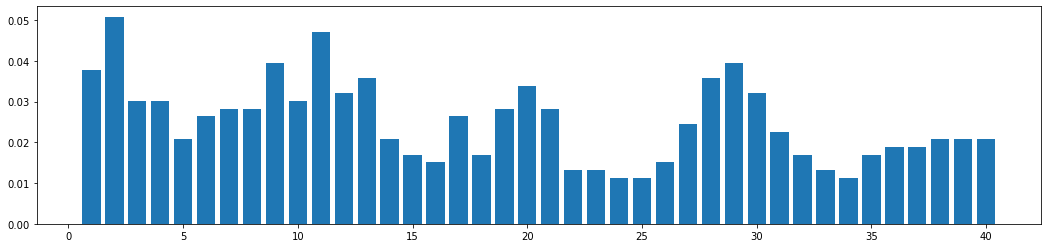

Bahinemo


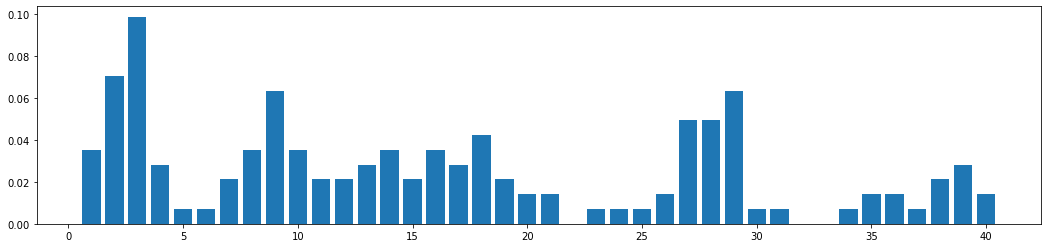

Bauzi


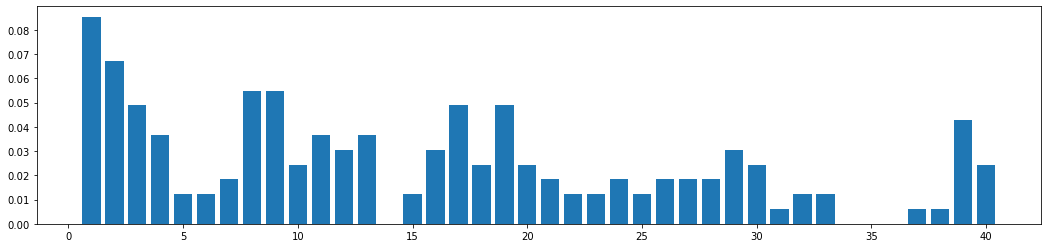

Berik


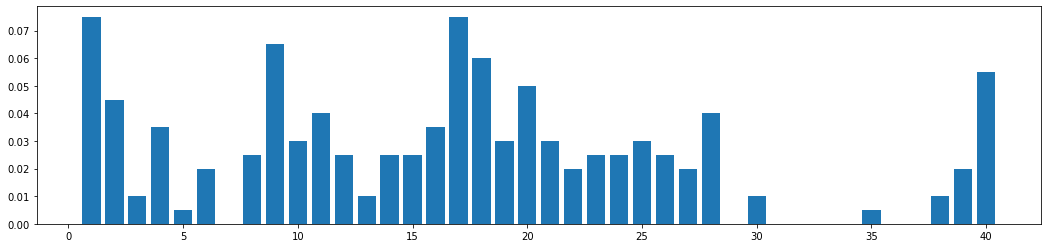

Bete


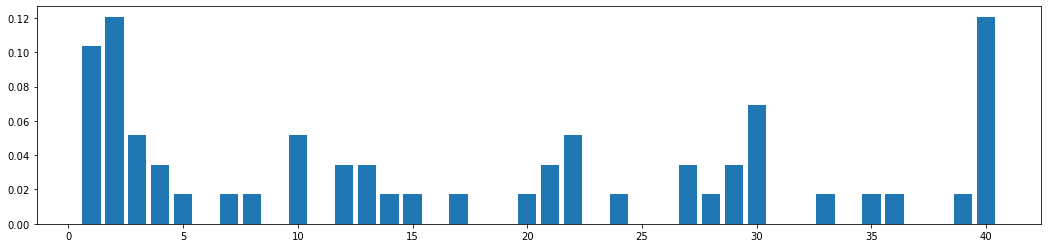

Bhili


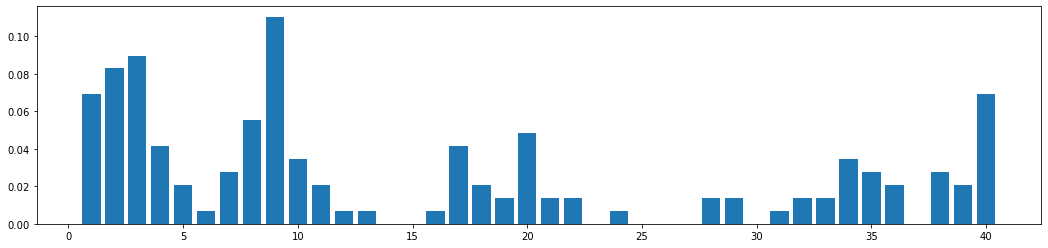

Buglere


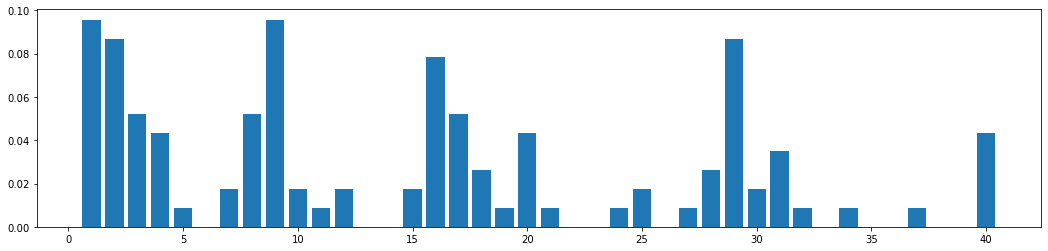

Cakchiquel


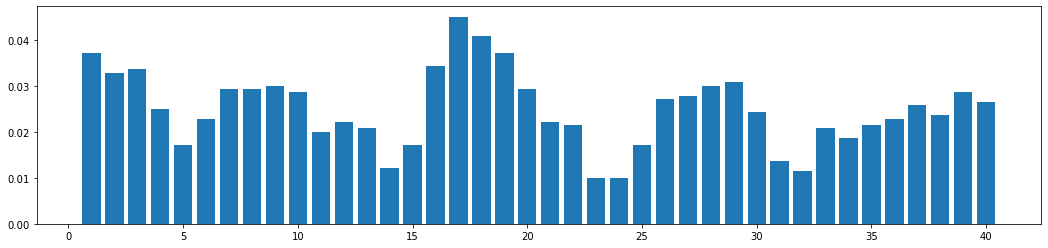

Ucayali Campa


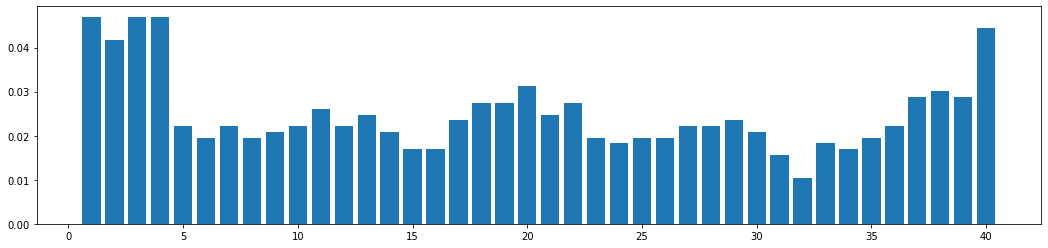

Camsa


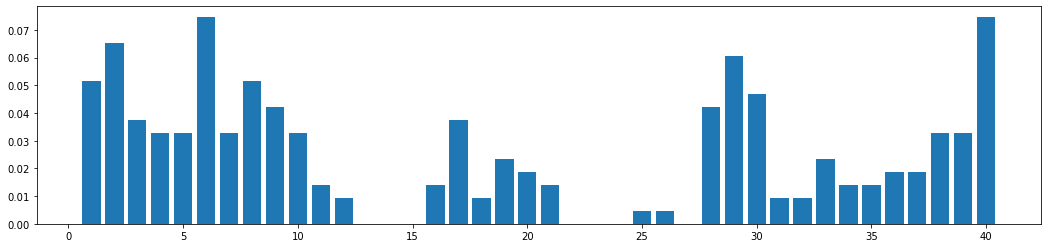

Candoshi


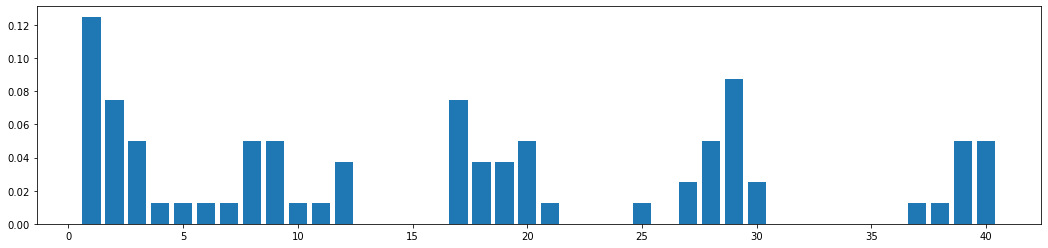

Cavine{\x96}a


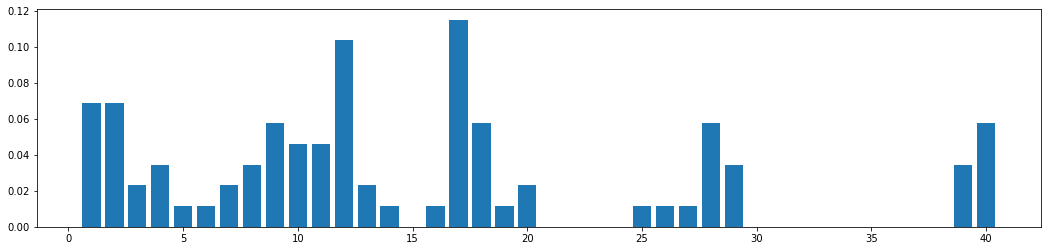

Cayapa


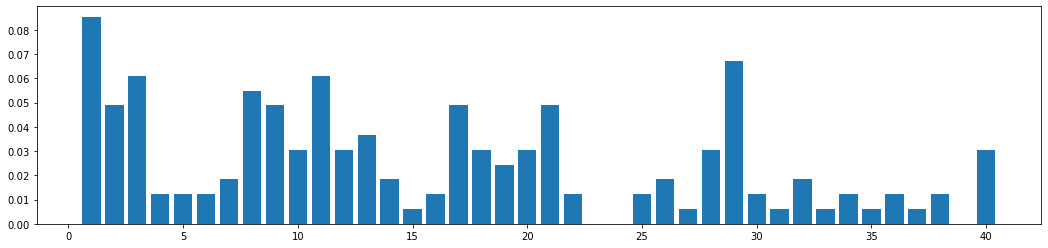

Ch{\x87}cobo


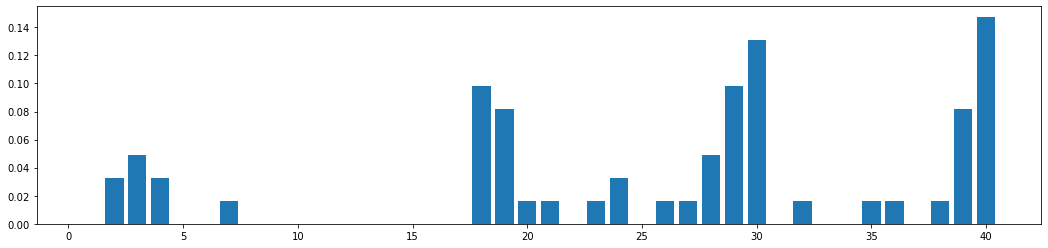

Chavacano


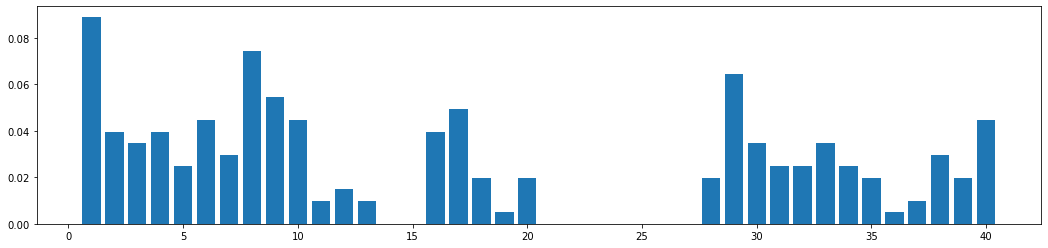

Chayahuita


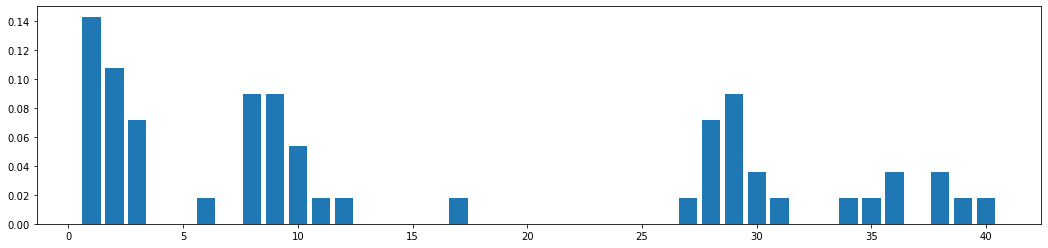

Chinanteco


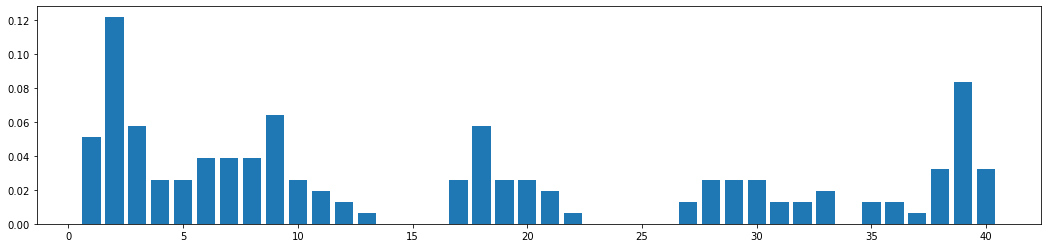

Chiquitano


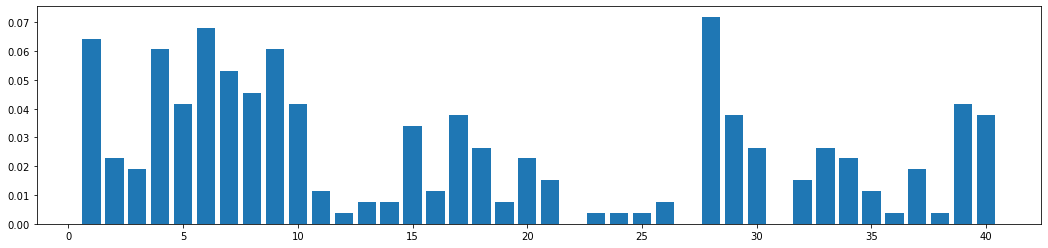

Chumburu


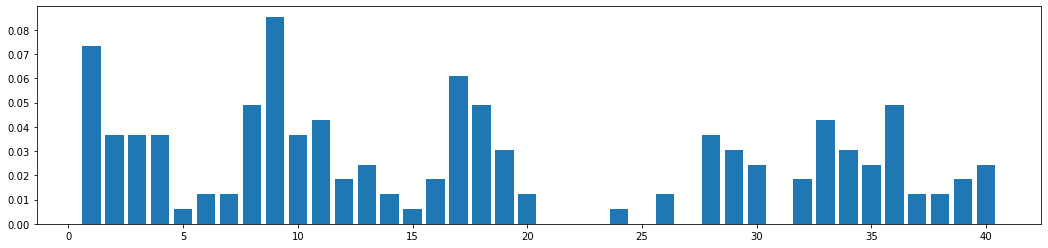

Cof{\x87}n


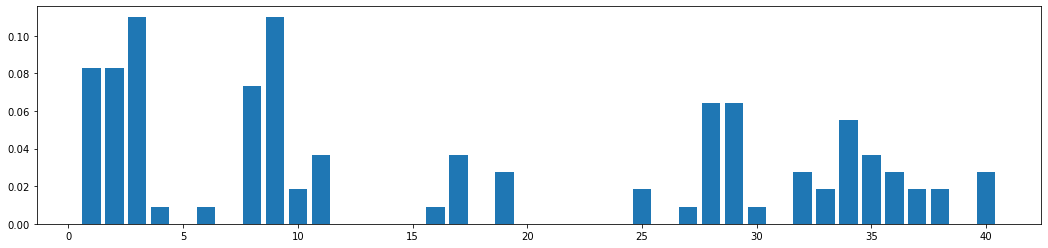

Colorado


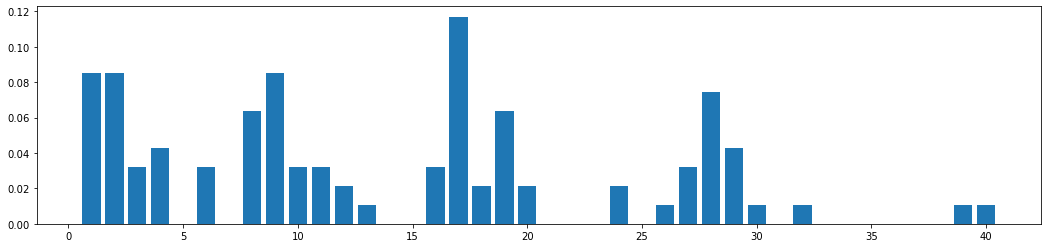

Eastern Cree


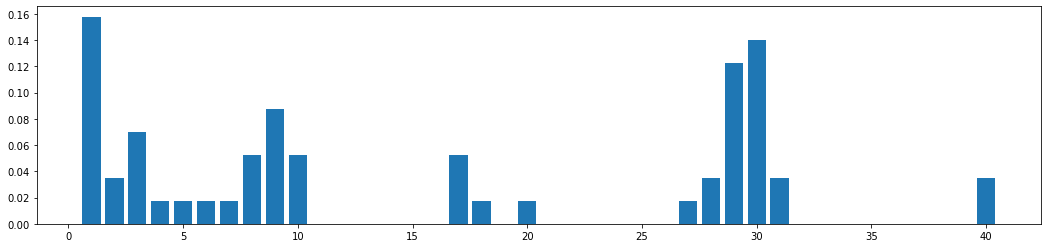

Culina


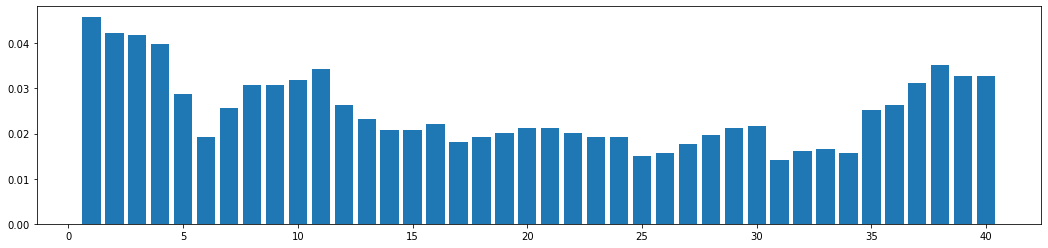

Didinga


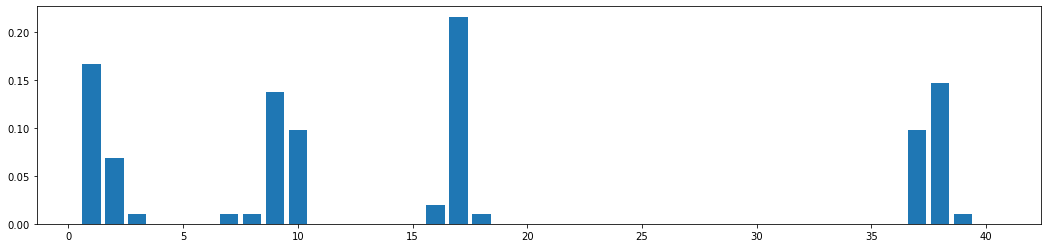

Djuka


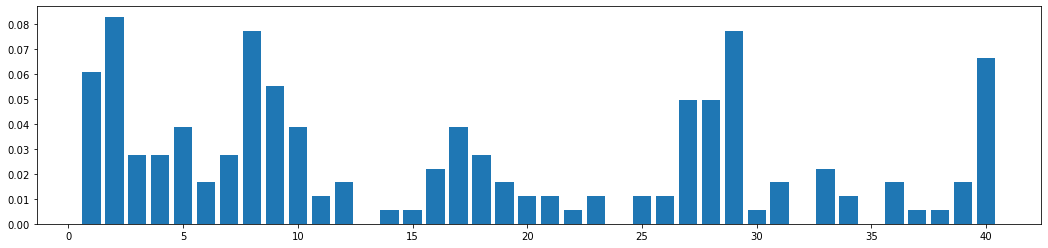

Dyimini


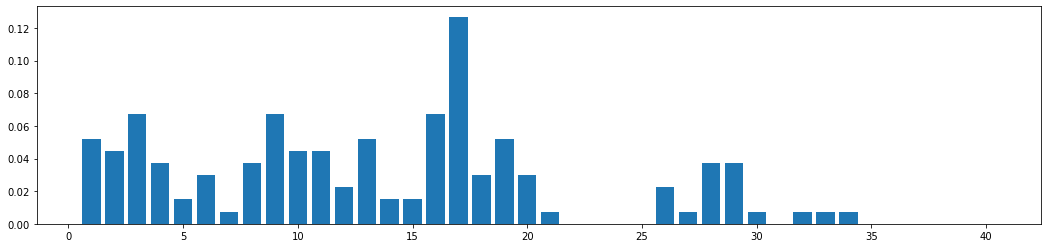

Ejagam


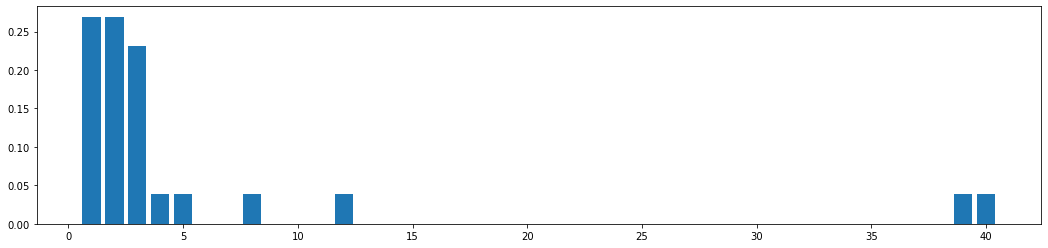

Ese Ejja


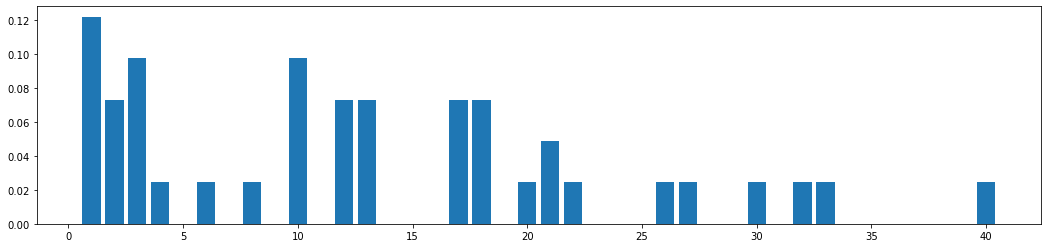

Carib


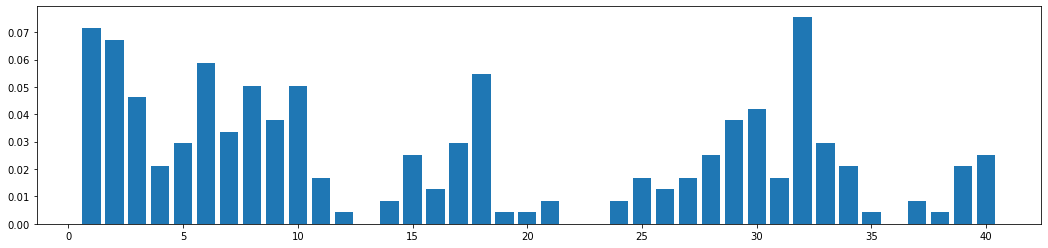

Guahibo


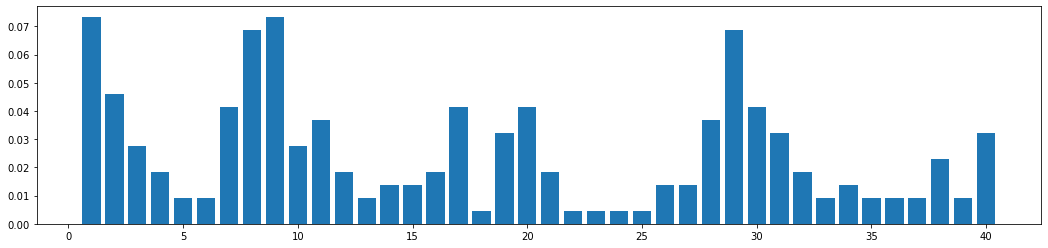

Guambiano


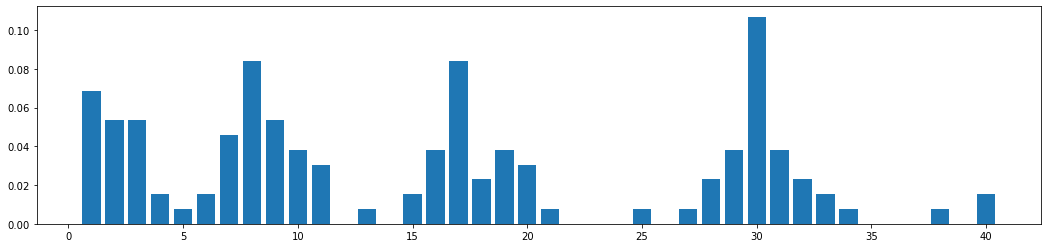

Guarijio


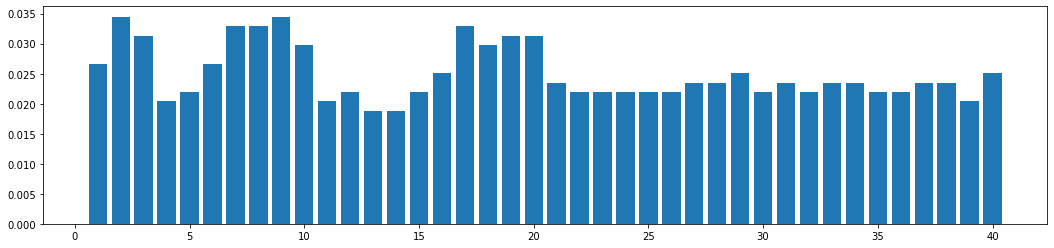

Ng{\x8A}bere


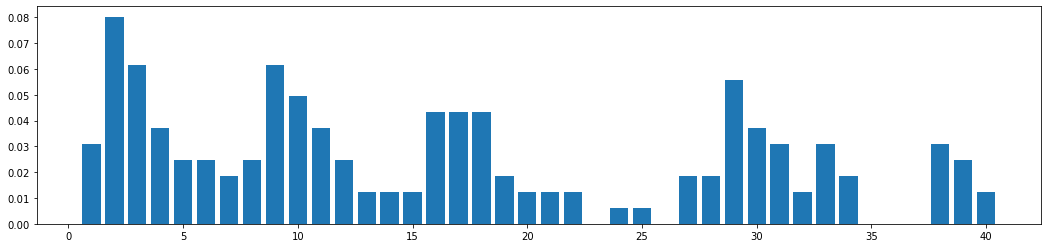

Gunu


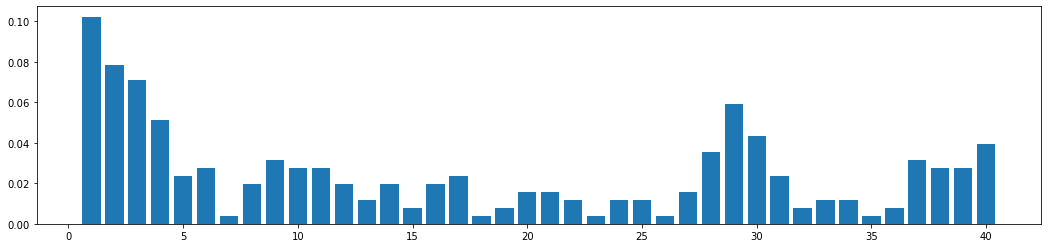

Halbi


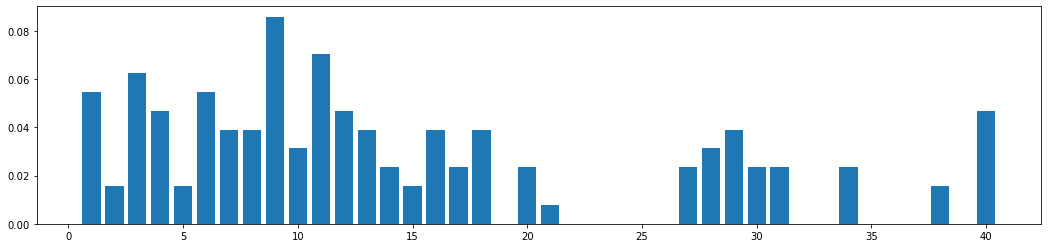

Huasteco


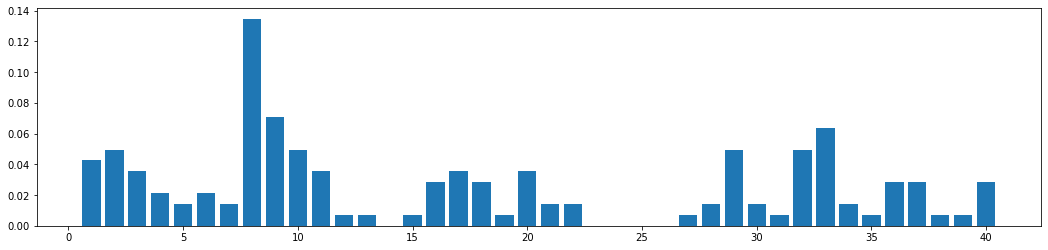

Huave


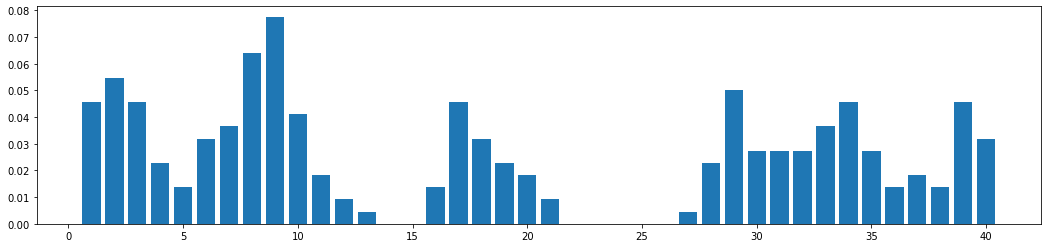

Iduna


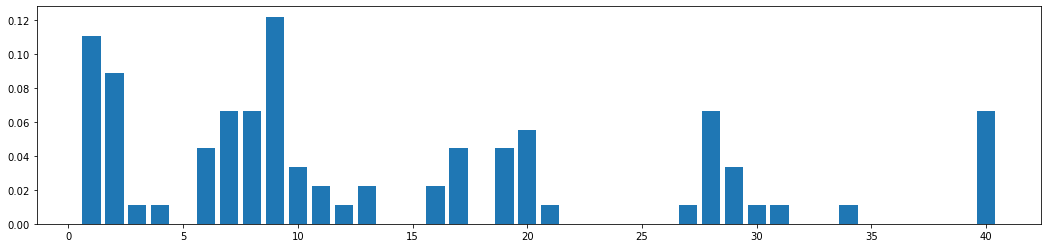

Ifugao


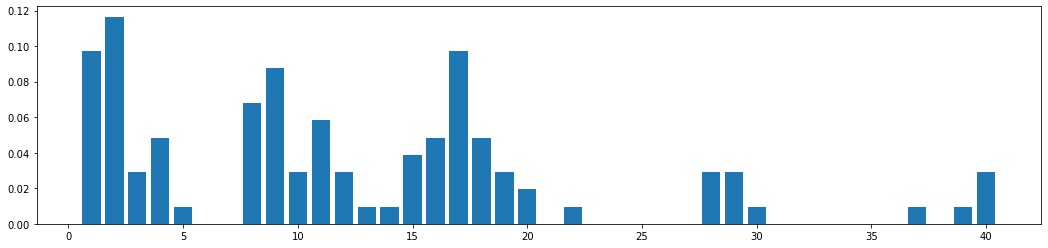

Sepik Iwam


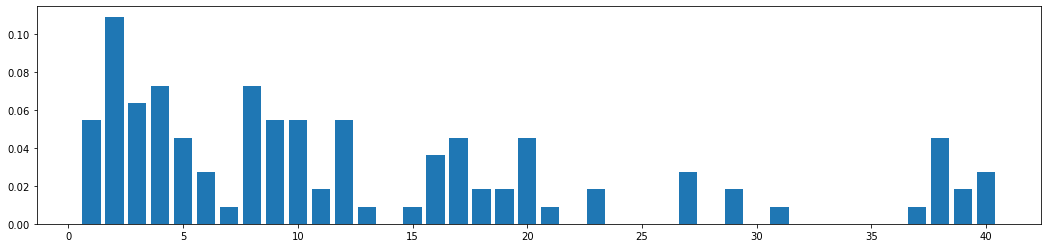

Jicaque


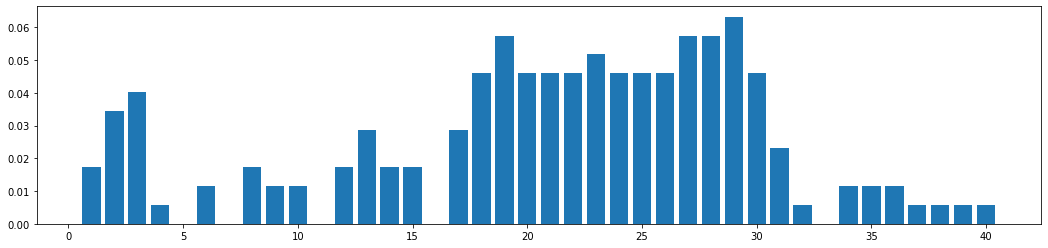

Kalam


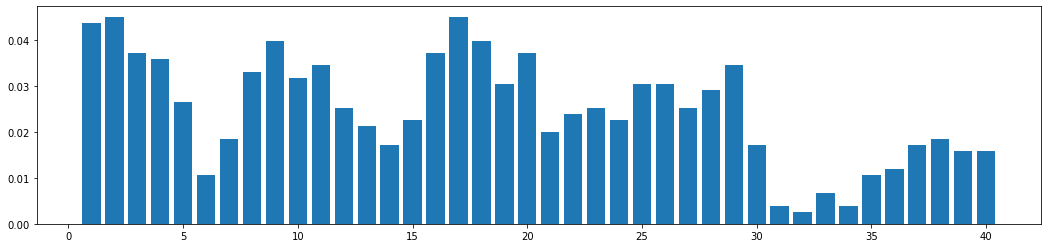

Kamano-Kafe


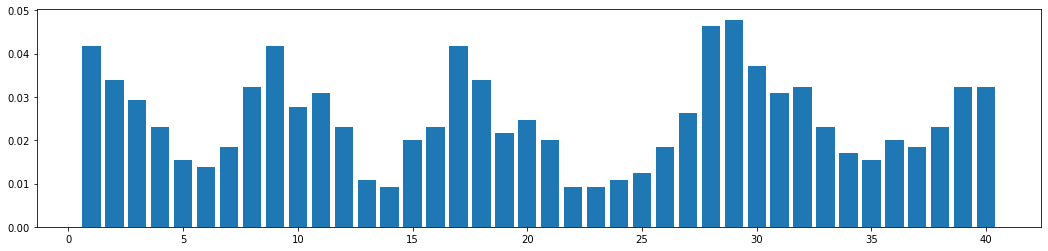

Karaja


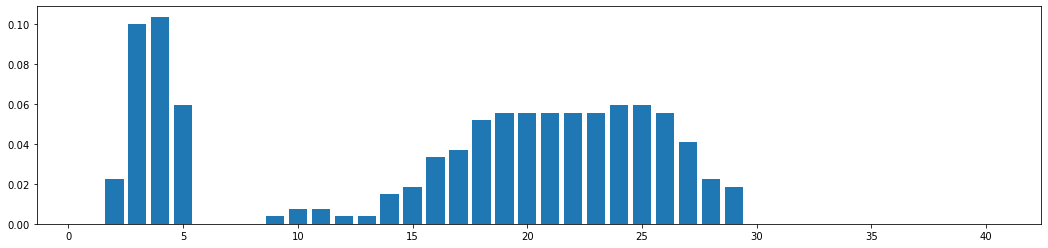

Kemtuik


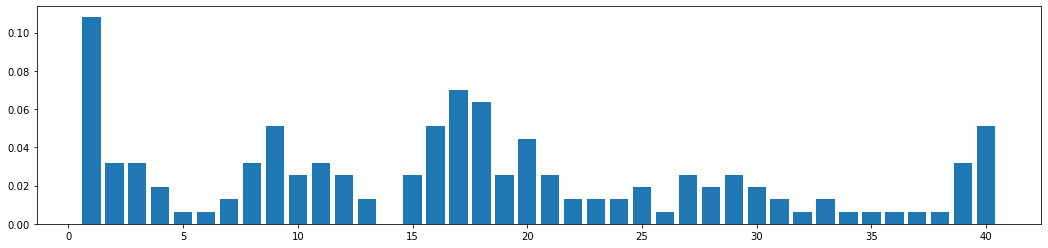

Kokoni


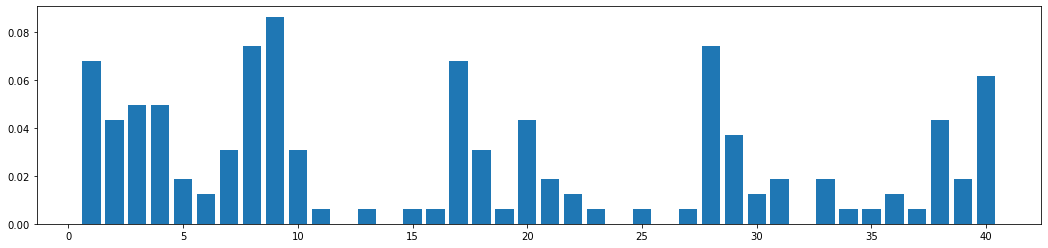

Konkomba


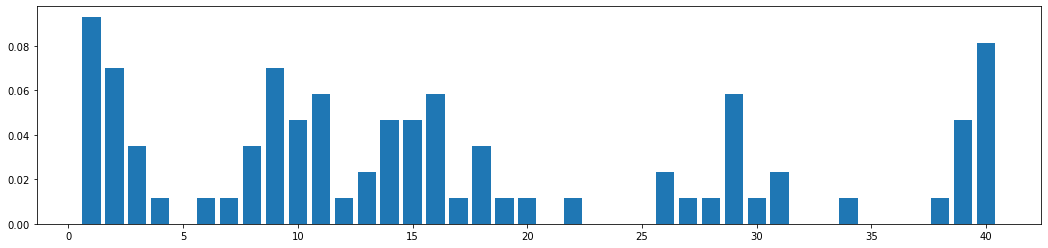

Kriol


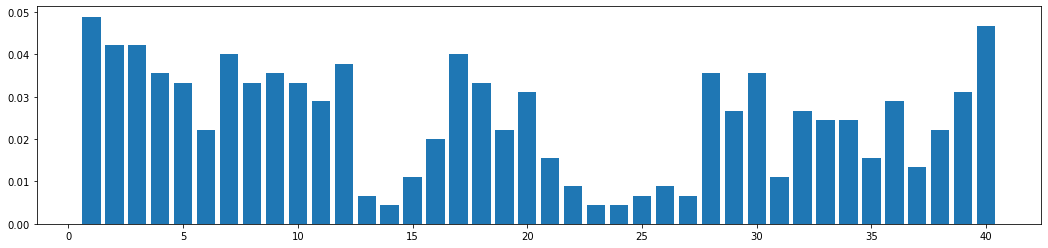

Kuku-Yalanji


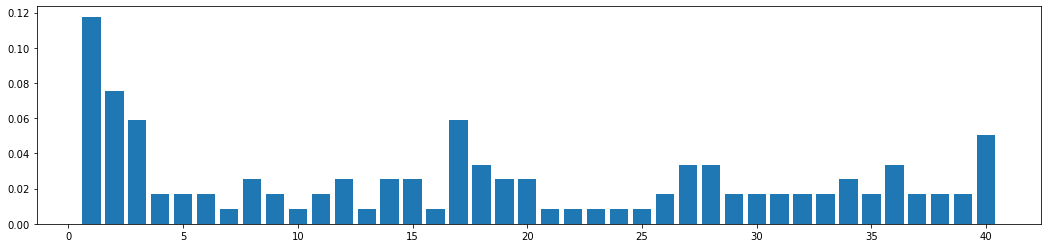

Long-haired Kuna


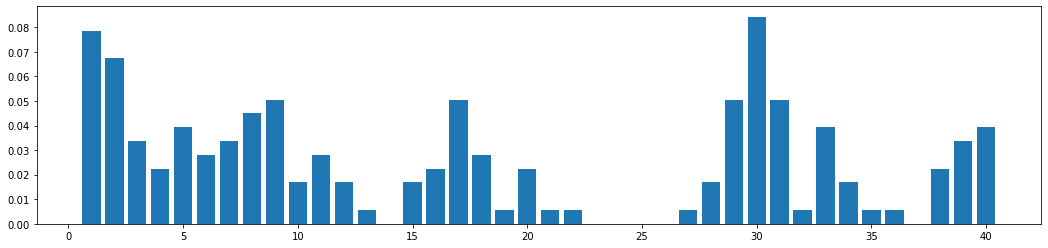

Kwerba


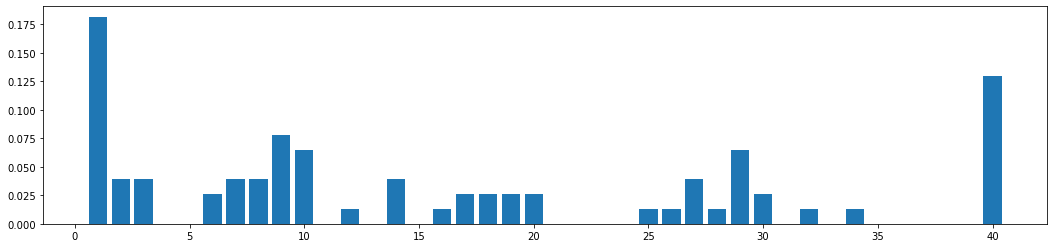

Lele


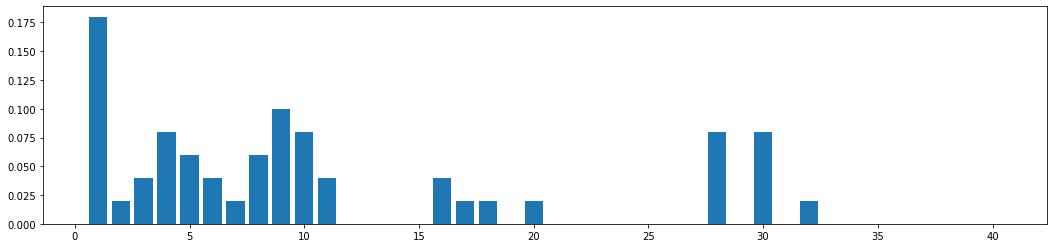

Mampruli


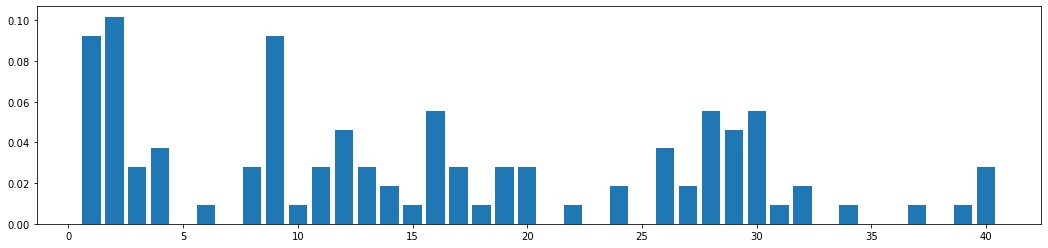

Maring


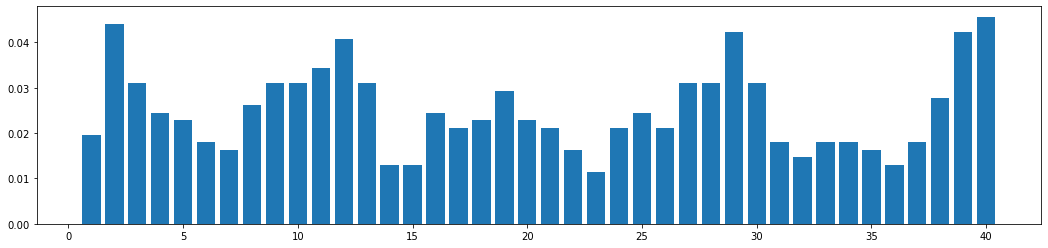

Martu Wangka


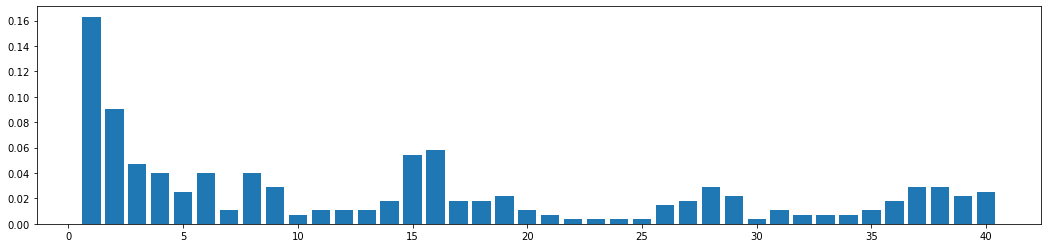

Mawchi


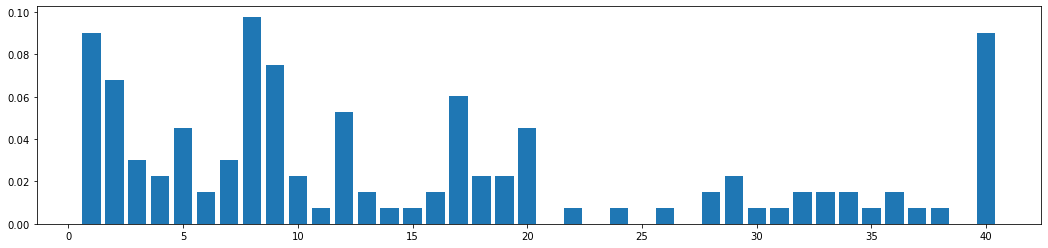

Mayoruna


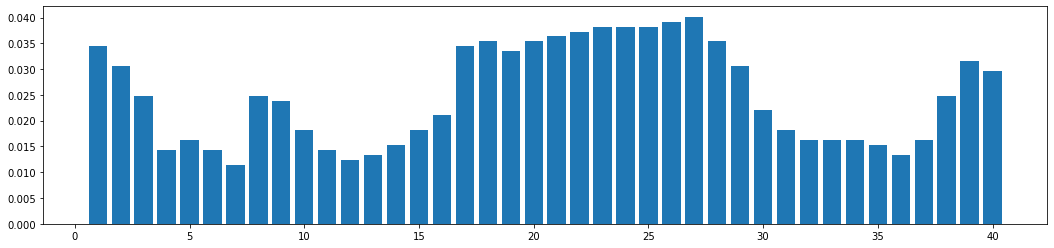

Mazahua


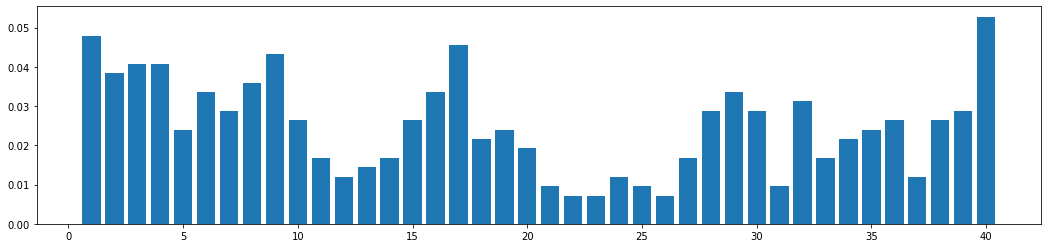

Mazateco


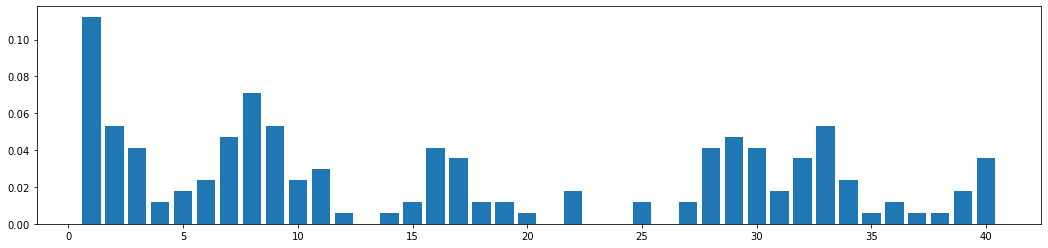

Menye


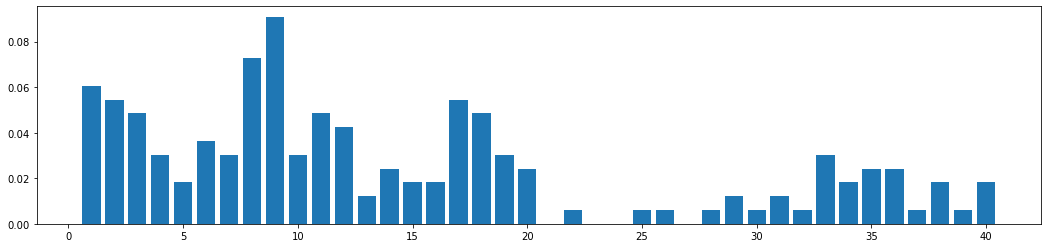

Micmac


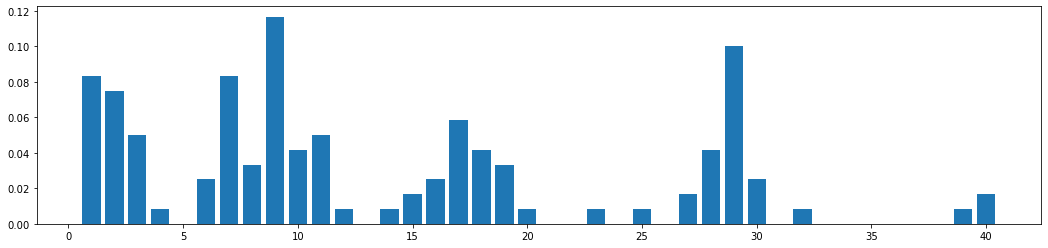

Mikasuki


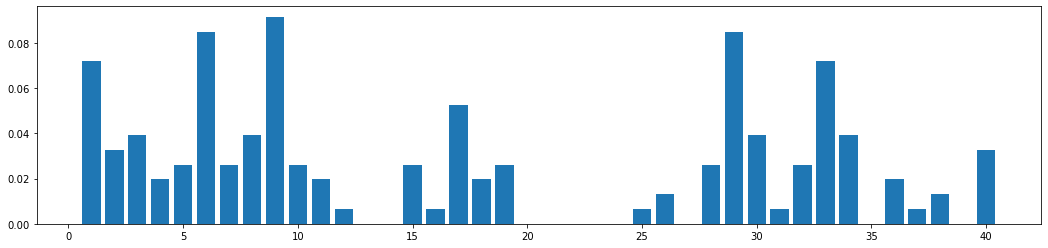

Mixteco


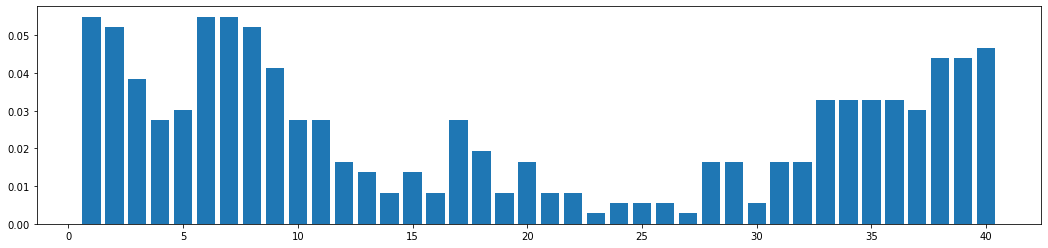

Mundu


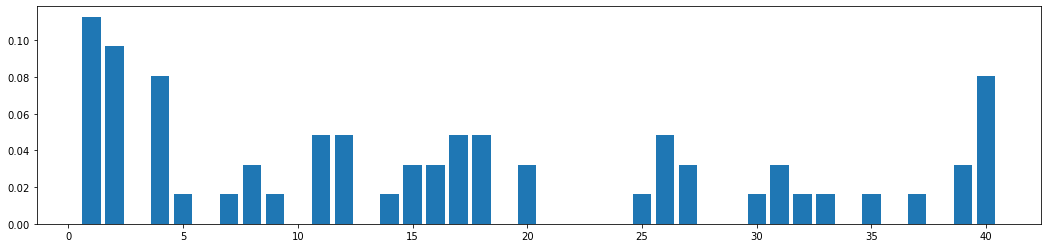

M{\x9C}ra Pirah{\x8B}


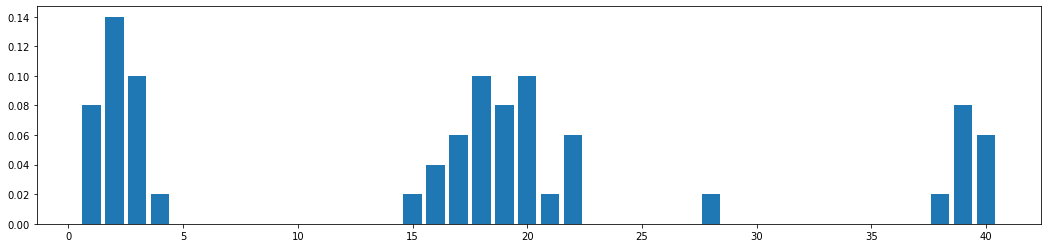

Murle


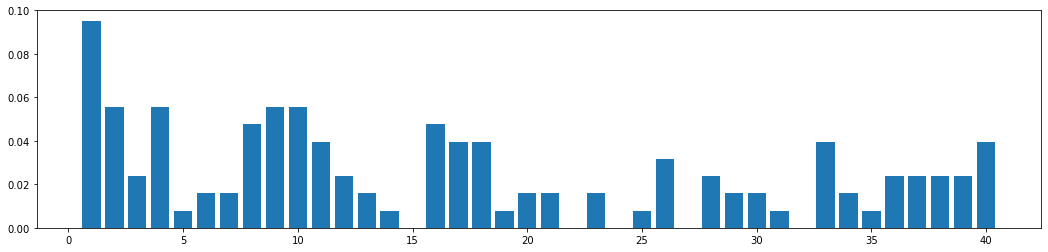

Murinbata


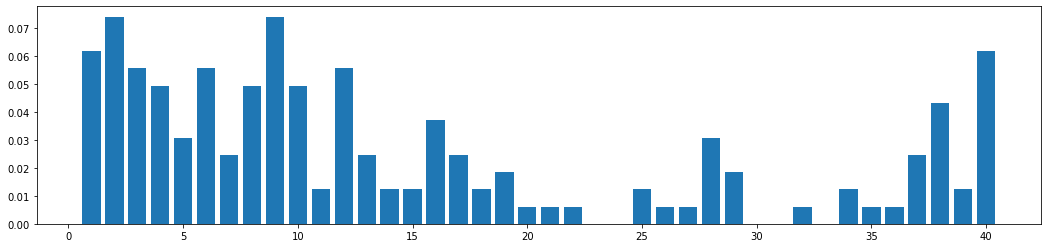

Nafaanra


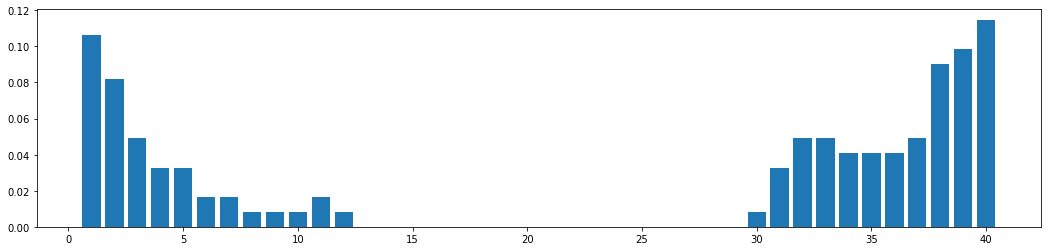

N{\x87}huatl


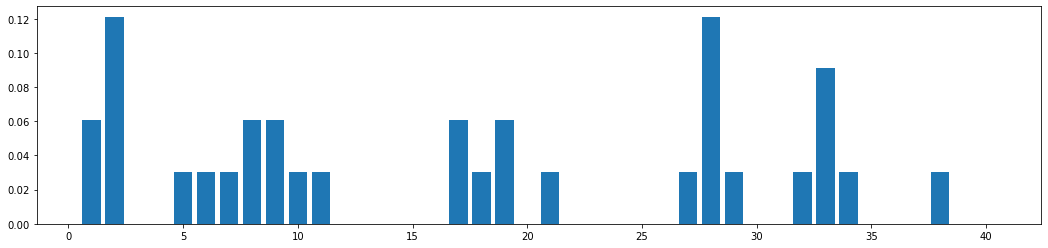

Ocaina


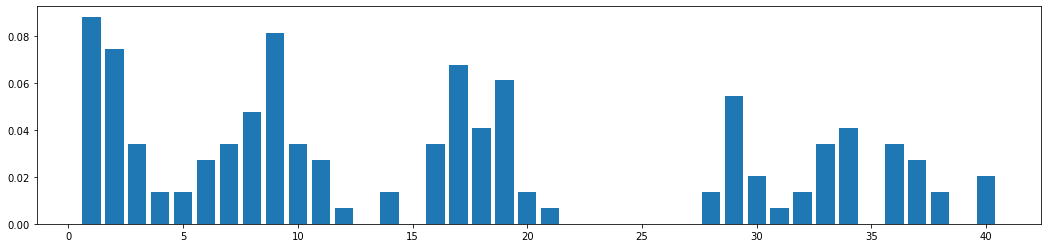

Papago


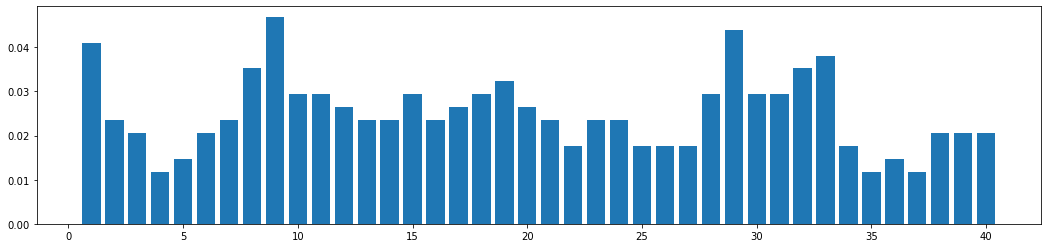

Patep


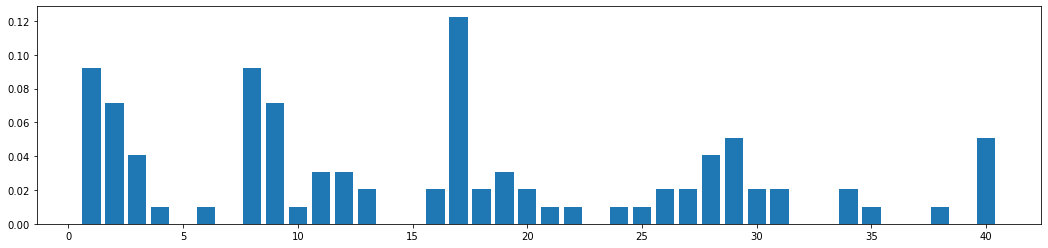

Paya


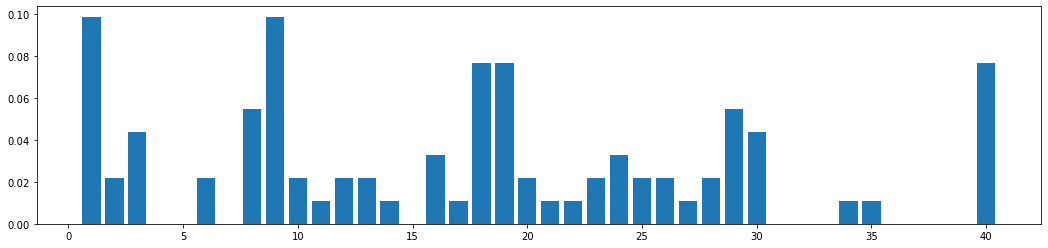

Podopa


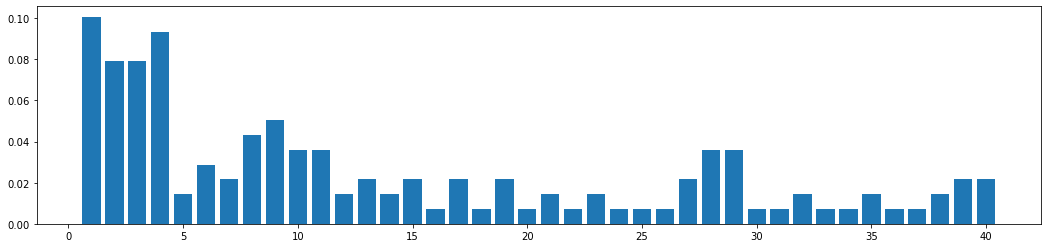

Saramaccan


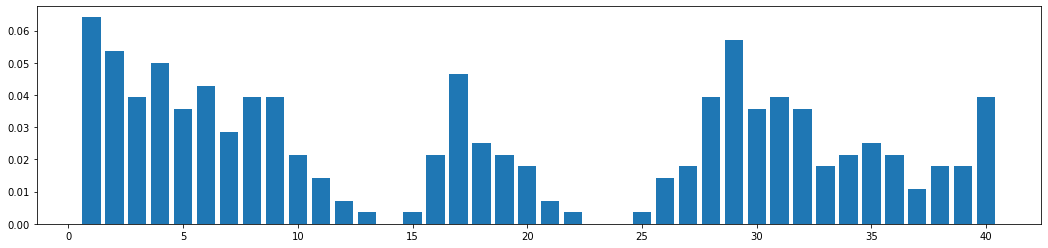

Seri


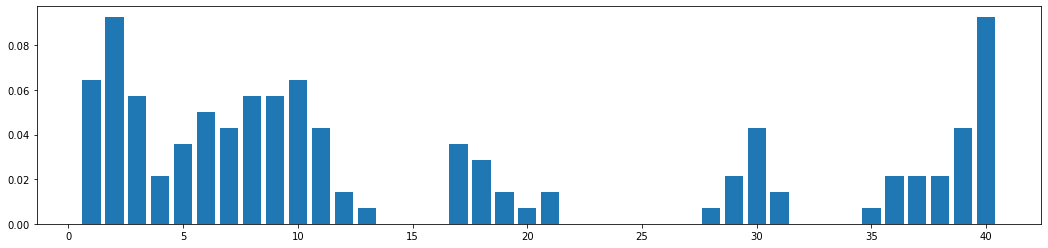

Shipibo


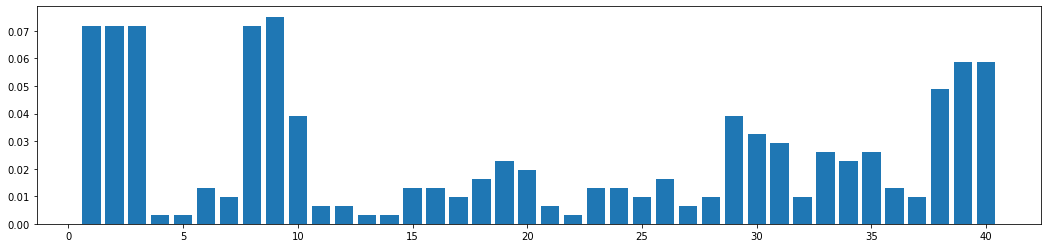

Sirion{\x97}


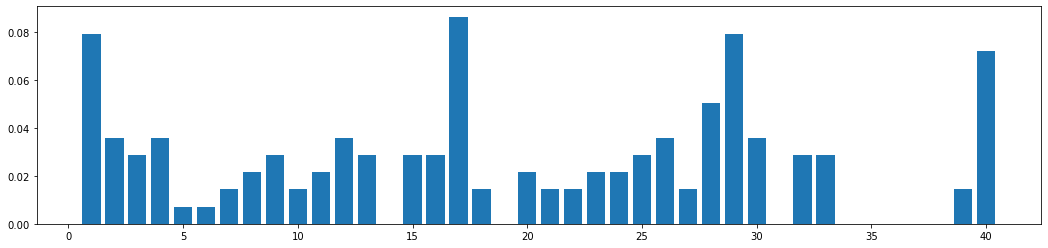

Slave


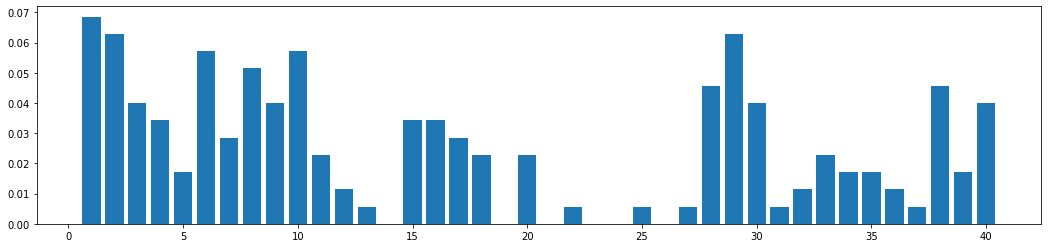

Sursurunga


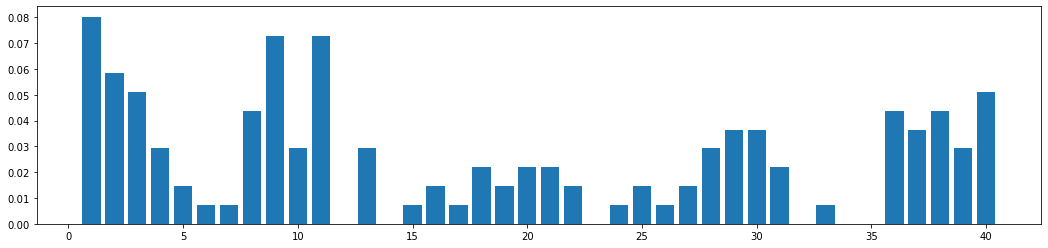

Tabla


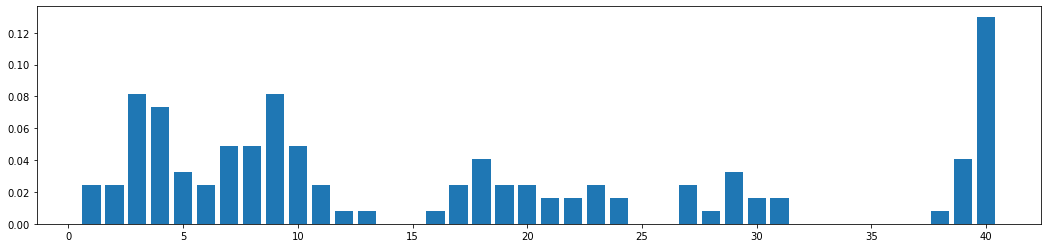

Tacana


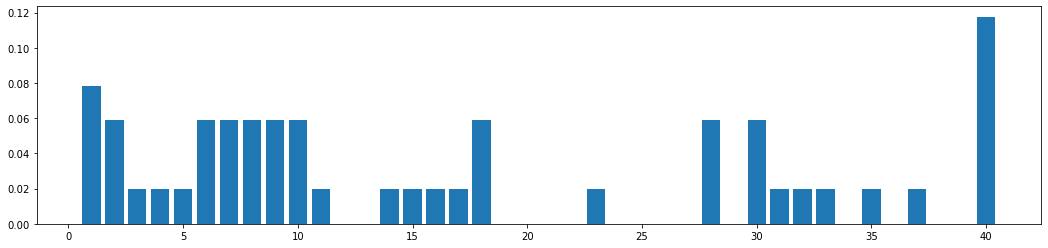

Central Tarahumara


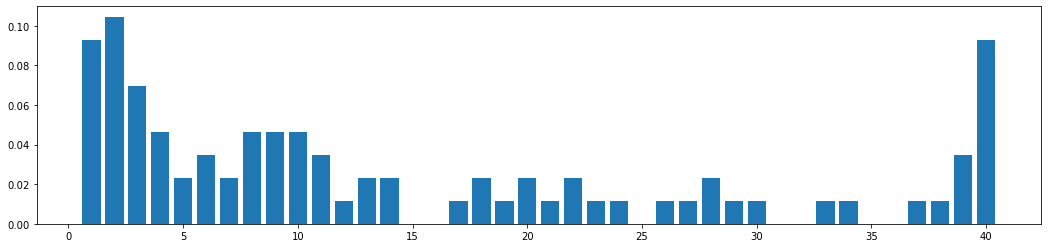

W. Tarahumara


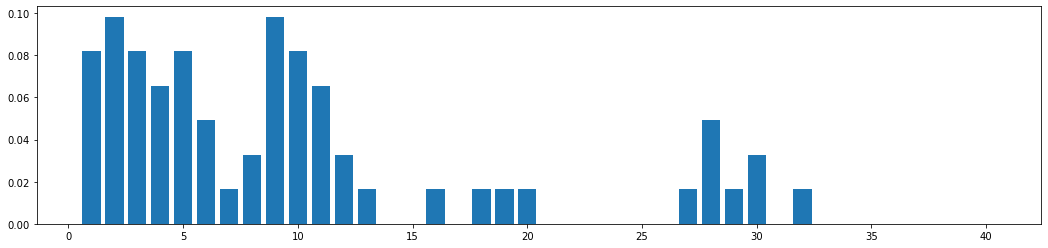

Tboli


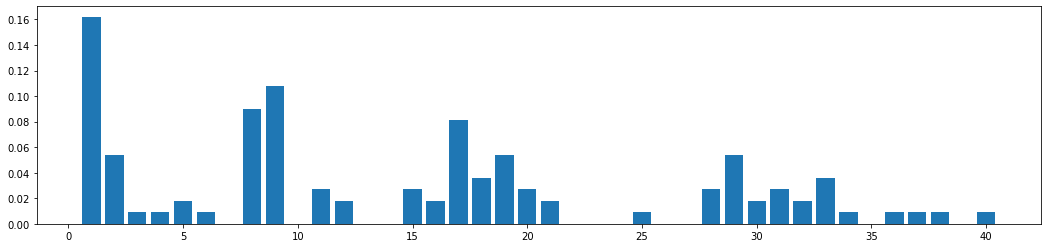

Teribe


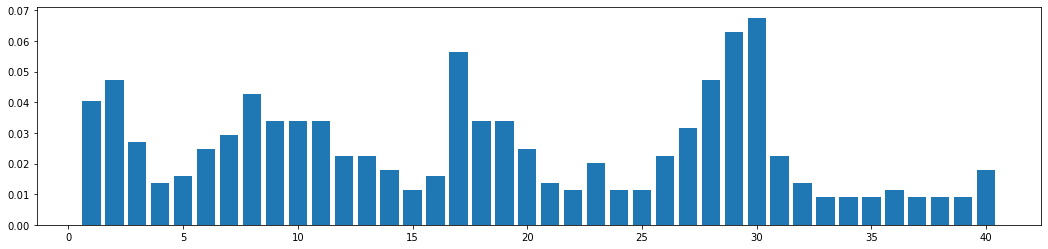

Ticuna


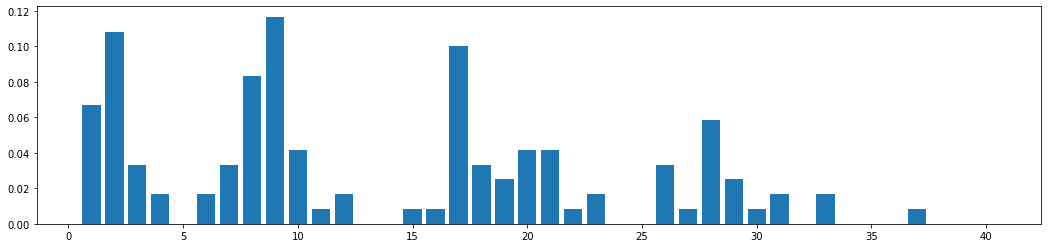

Tifal


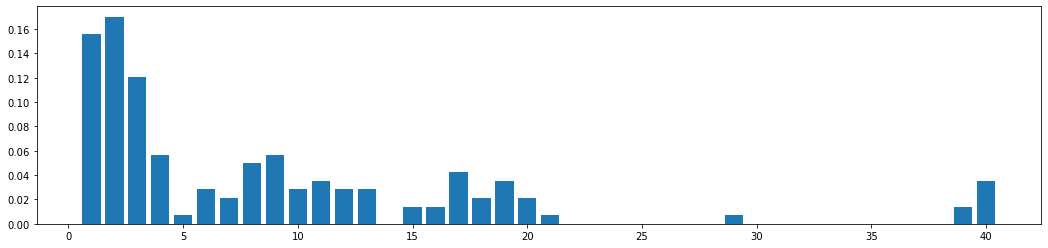

Tlapaneco


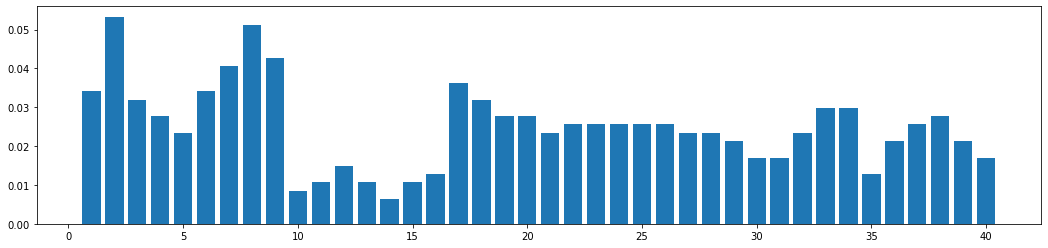

Tucano


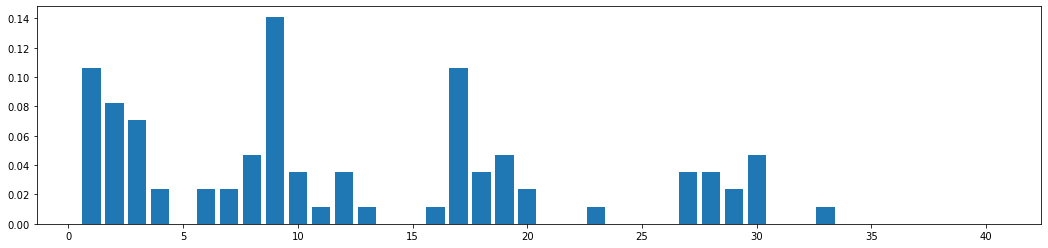

Vagla


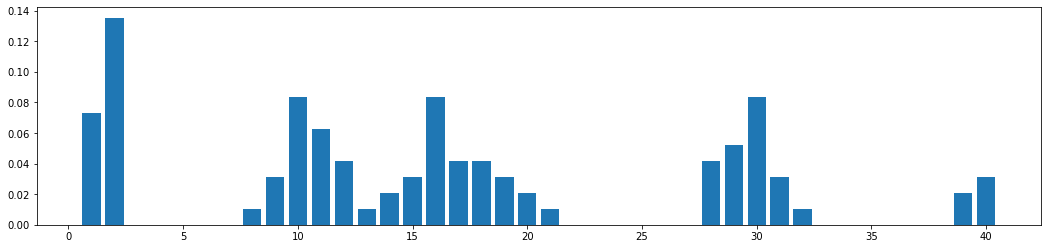

Vasavi


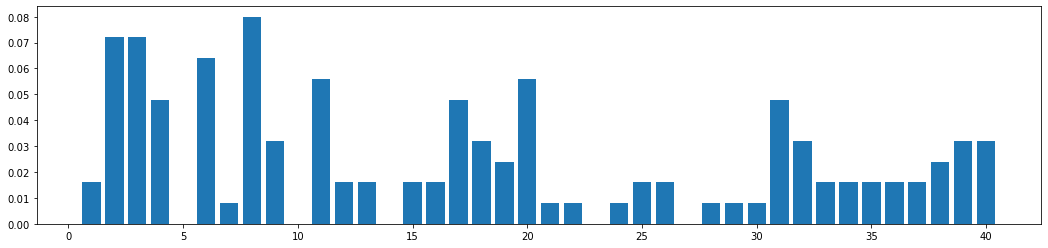

Waorani


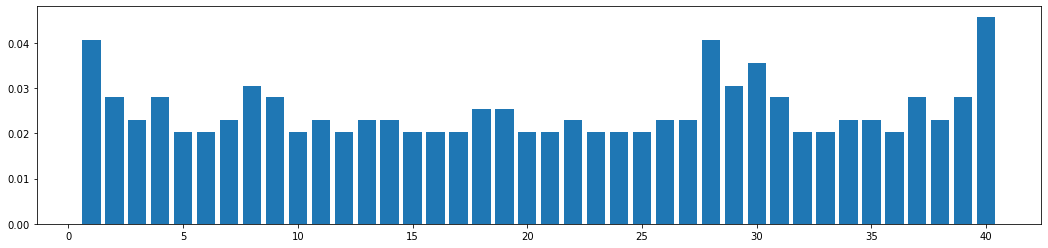

Walpiri


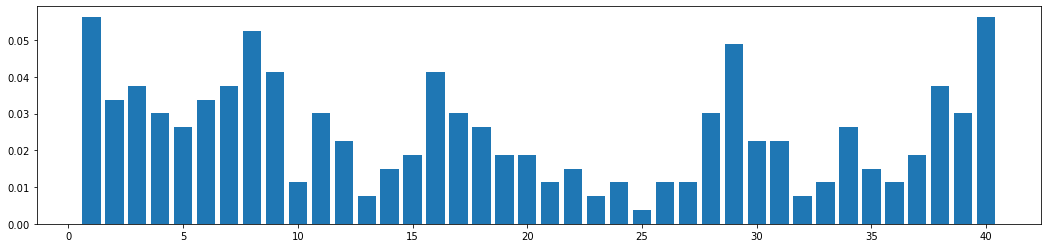

Wobe


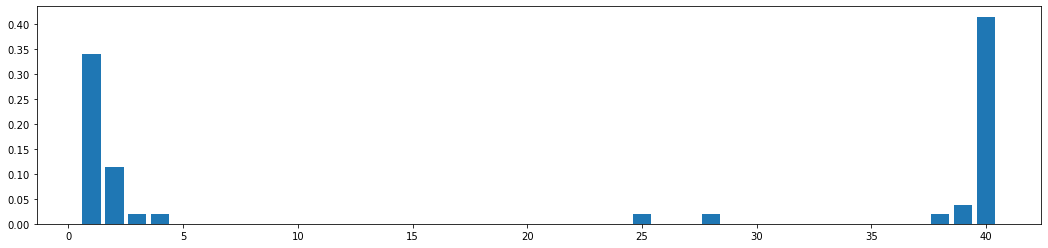

Yacouba


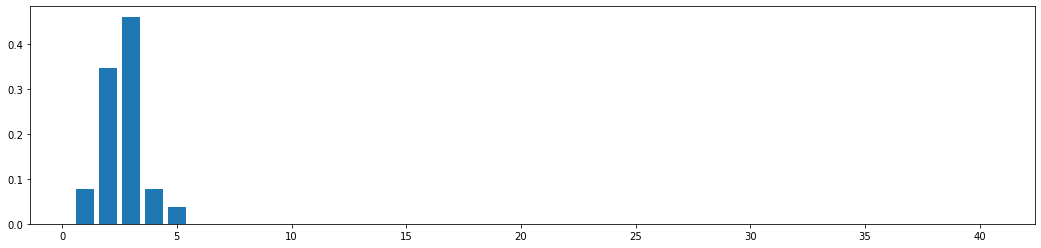

Yakan


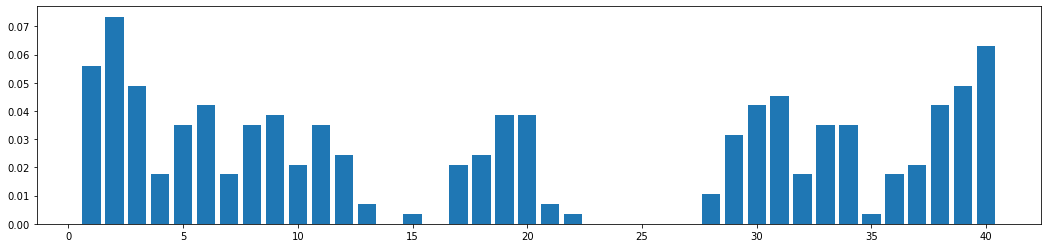

Yaminahua


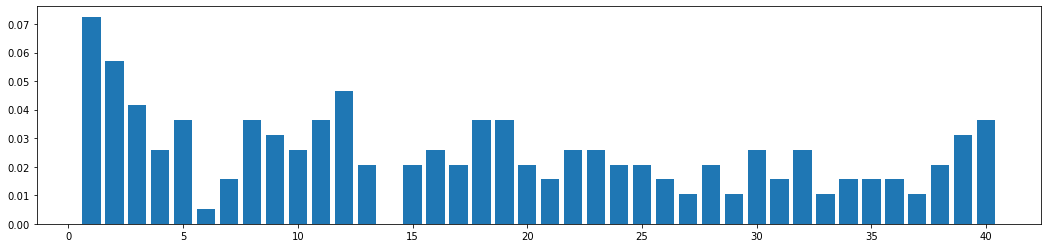

Yucuna


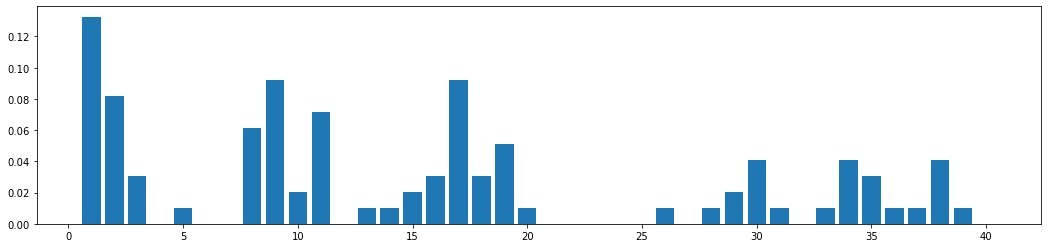

Yupik


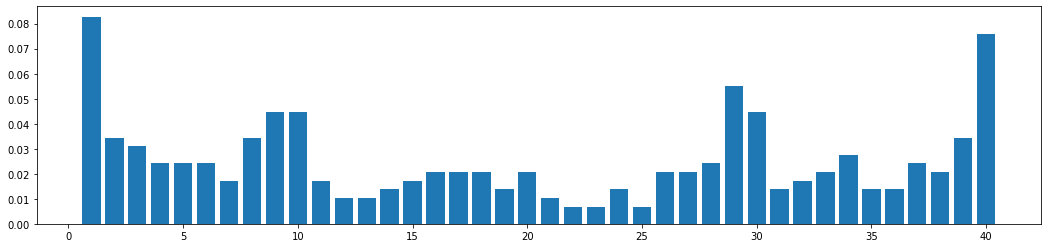

Zapoteco


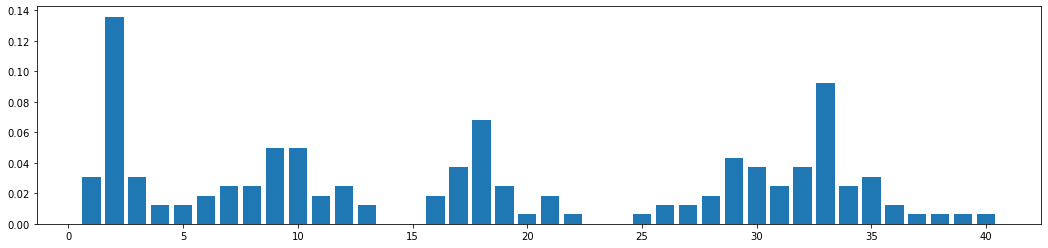

In [19]:
# now do the same for each lg in the WCS dataset, separately.
lgs = list(fdf.LgName.unique())
print ("There are", len(lgs), "different languages in the WCS.")

# d will hold counts, and prob will hold probs.
# each is keyed by lg name, and the corresponding value is a dict, in which key = col number, 
# and val = count or probability.
d = {}
prob = {}

# this just repeats what we did for one lg above, but for each lg separately, and without 
# printing out intermediate steps.
for lg in lgs:
    print(lg)
    # get lg-specific df.
    lg_df = fdf[fdf.LgName == lg]
    # get hits per cell
    hpc = lg_df.Chip.value_counts()
    # convert hpc to a dataframe
    hpc = pd.DataFrame({'Chip': hpc.index, 'Count': hpc.values})
    # now split apart Chip designation into separate Row and Col designations.
    hpc['Row'] = hpc.apply(lambda row: row.Chip[0], axis=1)
    hpc['Col'] = hpc.apply(lambda row: int(row.Chip[1:]), axis=1)
    # get columns counts, summing across rows.
    cols = list(range(1,40+1))
    d[lg] = {}
    for col in cols:
        subdf = hpc[(hpc.Col == col) & (hpc.Row != 'A') & (hpc.Row != 'J')]
        total = subdf.Count.sum()
        d[lg][col] = total
    # now cast as probability distribution, and plot.
    total = sum(d[lg].values())
    prob[lg] = {k: v/total for (k,v)in d[lg].items()}
    plot_distrib(prob[lg]) 


### How do individual languages compare to the aggregate distribution we saw earlier?

To answer this, we will need a measure of how similar or dissimilar two probability distributions are.  For this, we will use the [Kullback–Leibler (or KL) divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence), also called relative entropy.  The KL divergence $D_{KL}(P \mid\mid Q)$ measures how different a distribution $Q$ is from a given reference distribution $P$.  Generally, $P$ represents data and $Q$ represents some approximation to or model of the data.  $D_{KL}(P \mid\mid Q)$ then measures the amount of information lost when using $Q$ to approximate $P$.  The asymmetry in this definition is deliberately highlighted here, as the KL divergence is not symmetric: $D_{KL}(P \mid\mid Q) \ne D_{KL}(Q \mid\mid P)$.

In our case, $P$ will be the language-specific distributions of focus choices over grid columns that we just obtained, and $Q$ will be the aggregate distribution that we obtained earlier.  So in each case we ask how well the aggregate distribution models or approximates the language-specific data.  Concretely, we will ask which of the language-specific distributions $P$ is best approximated by the aggregate distribution $Q$ such that $D_{KL}(P \mid\mid Q)$ is minimized, and which is worst approximated by it such that $D_{KL}(P \mid\mid Q)$ is maximized.

What is the KL-divergence?  It is an information-theoretic measure that is related to others we have already seen, such as entropy and mutual information.  The formula for KL divergence is:

\begin{equation}
D_{KL}(P \mid\mid Q) = - \sum_{i=1}^n P(x_i) \log \frac{Q(x_i)}{P(x_i)}
\end{equation}

Whenever $P(x_i)$ is zero the contribution of the corresponding term in the sum is interpreted as zero, such that we needn't worry about division by zero.  The KL divergence is defined only if $Q(x) = 0 \implies P(x) = 0, \forall x$; otherwise we would have $\log 0$, which is undefined.  We are taking $Q$ to be the aggregate distribution, which as we saw above has no zero counts in it, so we should avoid this potential problem.

The KL divergence is always greater than or equal to zero.  You should be able to convince yourself that it reaches zero when $P(x_i) = Q(x_i), \forall i$.

In [20]:
def kl_divergence(p,q):
    """
    KL divergence between 2 distribs p and q.
    we assume each is represented as a dict, with key = outcome and val = prob of outcome.
    we also assume p and q have the same keys.
    """
    total = 0.0
    for i in p.keys():    # we assume p and q have the same keys.
        if p[i] > 0:
            total += - p[i] * math.log2(q[i]/p[i])
    return(total)

WCS aggregate distribution


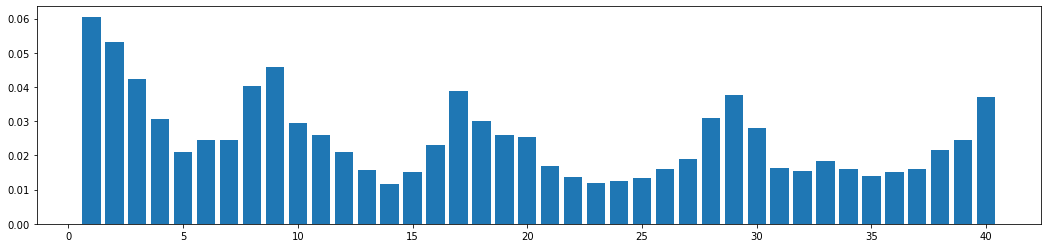

Language best approximated by WCS aggregate distribution: Kamano-Kafe
KL divergence: 0.06238825653600832


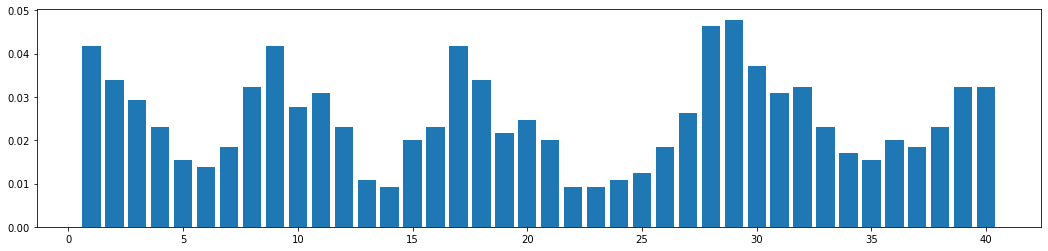

Language worst approximated by WCS aggregate distribution: Yacouba
KL divergence: 2.6885401468479126


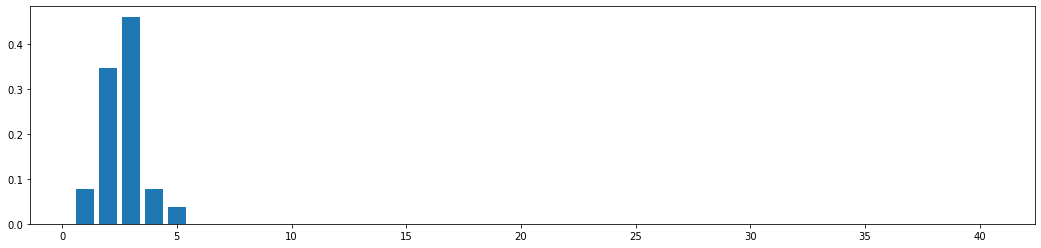

In [21]:
# at this point, we have focus distribs for each lg, and an aggregate WCS distrib based on all lgs.
# now measure KL divergence between each lg distrib and the aggregate distrib.
# pick out the lgs with min and max KL divergence with aggregate.

min_kl = 10000000  # very large number
max_kl = 0  # minimally small number
min_kl_lg = ""
max_kl_lg = ""
for lg in lgs:
    kl = kl_divergence(prob[lg],prob_wcs)
    if kl < min_kl:
        min_kl = kl
        min_kl_lg = lg
    if kl > max_kl:
        max_kl = kl
        max_kl_lg = lg
        
# now print out results.
print("WCS aggregate distribution")
plot_distrib(prob_wcs)
        
print("Language best approximated by WCS aggregate distribution:", min_kl_lg)
print("KL divergence:", min_kl)
plot_distrib(prob[min_kl_lg])

print("Language worst approximated by WCS aggregate distribution:", max_kl_lg)
print("KL divergence:", max_kl)
plot_distrib(prob[max_kl_lg])

# Observations and conclusions

- Please summarize your observations here, and say what conclusions you can draw from what you have seen.  A short paragraph should be adequate, but please separate out observations and conclusions.

- Optionally, you could follow up on any initial conclusions by conducting further analyses of your own devising on the same dataset, to test those initial conclusions.